# CoreMorph


In the basic algorithm, the graph fragments that make up the grammar are defined by a rootnode, a radius and a thickness. 
A fragment is called a $CIP_{radius}^{thickness}(root)$. The core is made up of all the nodes in a certain radius around the root. Interface part is 
the subgraph induced by every node in distance radius+thickness arround the root minus nodes in the core.


Here, we generate a graph minor (by contracting edges) for any given input graph. We extract the CIP from the graph minor.  Due to the contraction 
one node in the minor may represent any number of nodes in the unaltered graph. 
once we have the core in the unaltered graph, we can consider all nodes in THICKNES distance to this core and obtain a new interface. 

Core and interface of the unaltered graph are saved in the grammar.
There is still unused information in the interface of the minor graph. In the congruency check that will tell is if two CIPs are exchangeable, we not only check the unaltered graph interface but also the minor graphs interface. We hope that this will increase the score of the resulting applications of productions.

#### initialise nb

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

DEBUG=True
NJOBS=4
if DEBUG: NJOBS=1

from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1+DEBUG)

from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [2]:
# data source, see introduction for info.
from eden.io.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname='../toolsdata/bursi.pos.gspan', size=100):
    return  list(islice(gspan_to_eden(dataset_fname),size))
import warnings
warnings.filterwarnings('ignore')

# Meet the GraphTransformer (and the decomposer)

A graph transformer in general is used in two stages of the sampling process.
First on an incoming graph to make it graphlearnable. Then, after a graph was changed, it might get 
retransformed.
An example of this might be an RNA molecule that one wishes to refold after changing parts of the secondary structure graph.

The decomposer is the interface between graphs and graphlearn.
It is conducting substitutions of CIPs and extract CIPs from the graph.


As long as the decomposer is delivering acceptable data, the sampler will not care what the graph looks like.
It might not exist at all or have this second minorgraph version working in the background.


### Data Defined Transformation
In this first example, the graphminor generation is learned.
We do this by using the (one class) estimator to annotate the nodes in the graph, then the graph is contracted
on nodes with similar scores.
The subgraphs obtained in this way are then clustered and the clustername is used for the names of the parts.


# User Defined GraphTransformer

Here we see another example of a way to generate a graph minor.

Since we are working on molecules, cyclic structures are of interest.
Therefore it makes sense to introduce an abstraction based on these cycles.

In this case the graph minor generation is not learned but boringly generated.


##### notice how each cycle is contracted to one node in the minor graph.

In [3]:
from graphlearn.utils import draw
import graphlearn.minor.molecule.transform_cycle as mole
import graphlearn.minor.decompose as decompose
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer

'''
decomposer = decompose.MinorDecomposer(include_base=False, base_thickness_list=[2])

#the preprocessor makes the abstraction, wrapper provides convenient format for drawing
preproc=mole.GraphTransformerCircles()
# get a graph and prepare it
graphs=get_graphs()
g=graphs.next()
graph_wrapper=decomposer.make_new_decomposer(preproc.wrap(g))
graph=graph_wrapper.pre_vectorizer_graph(nested=True)

# draw 
draw.graphlearn(graph,size=10, abstract_color='red', contract=True,ignore_for_layout='nesting')
'''

"\ndecomposer = decompose.MinorDecomposer(include_base=False, base_thickness_list=[2])\n\n#the preprocessor makes the abstraction, wrapper provides convenient format for drawing\npreproc=mole.GraphTransformerCircles()\n# get a graph and prepare it\ngraphs=get_graphs()\ng=graphs.next()\ngraph_wrapper=decomposer.make_new_decomposer(preproc.wrap(g))\ngraph=graph_wrapper.pre_vectorizer_graph(nested=True)\n\n# draw \ndraw.graphlearn(graph,size=10, abstract_color='red', contract=True,ignore_for_layout='nesting')\n"

# Generating a Sampler that uses GraphMinors

There are no modifications made to the sampler.
Just new decomposer and graphtransformer parameters are given.

accept_min_similarity: 0.0
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
core_choice_bytrial: False
core_choice_bytrial_multiplier: 1.0
decomposer: no graphs in decomposer
estimatorobject: <graphlearn.estimate.OneClassEstimator instance at 0x7f06aa3275a8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f06aa3275f0>
graph_transformer: <graphlearn.learnedlayer.transform.GraphMinorTransformer object at 0x7f06a84741d0>
improving_linear_start_absolute: 0
improving_linear_start_fraction: 0
improving_penalty_per_step: 0.04
improving_threshold_absolute: 25
improving_threshold_fraction: 0.5
include_seed: True
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f06aa32d690>
maxbacktrack: 0
   monitor: True
  monitors: []
    n_jobs: 1
 n_samples: 5
   n_steps: 50
orig_cip_max_positives: 1
orig_cip_min_positives: 0
orig_cip_score_tricks: False
probabilistic_core_choice: True
proposal_proba

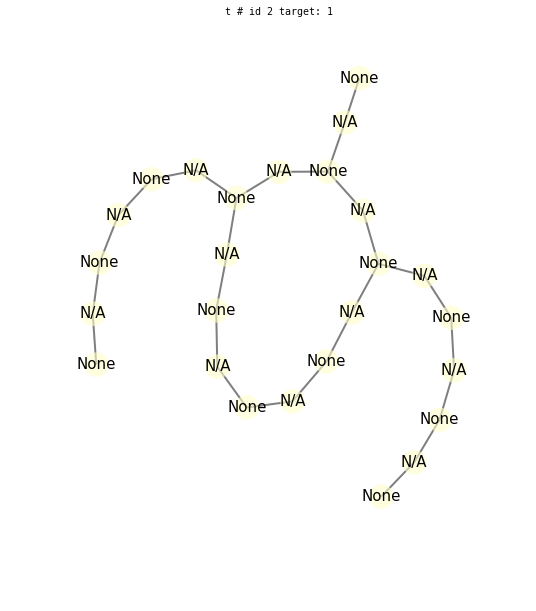

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



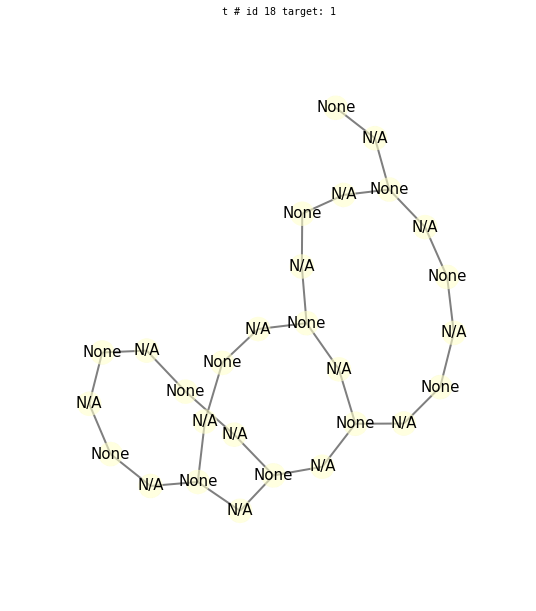

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfa

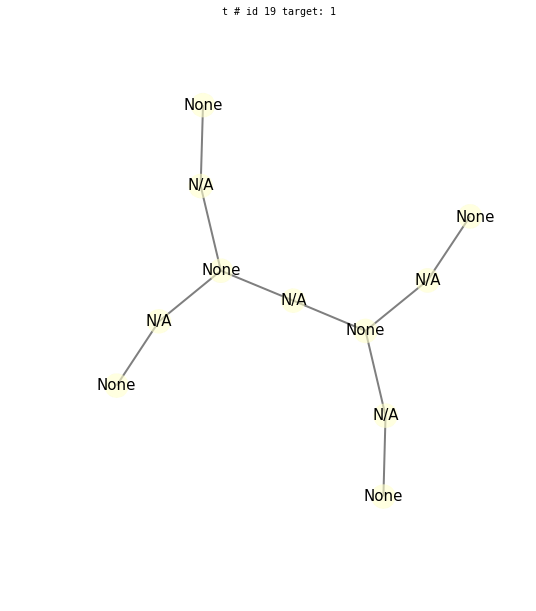

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



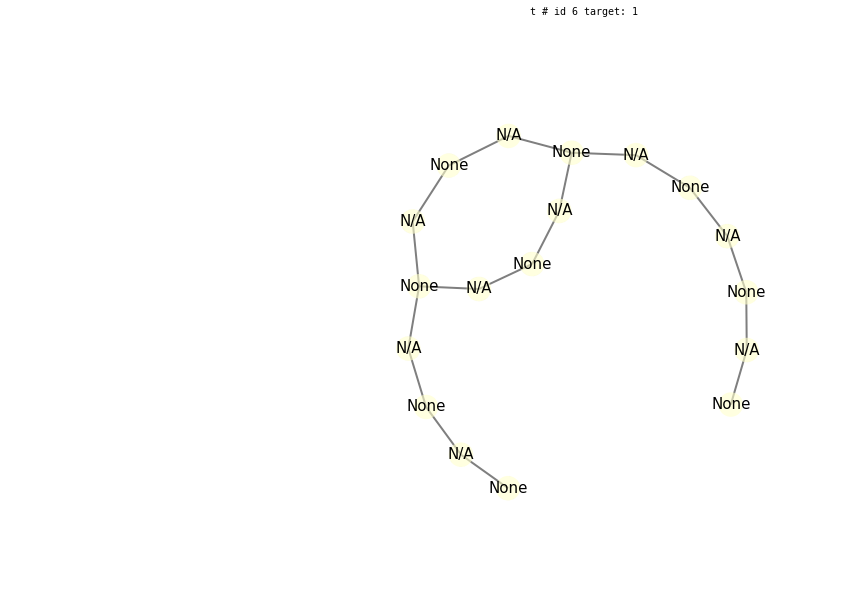

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



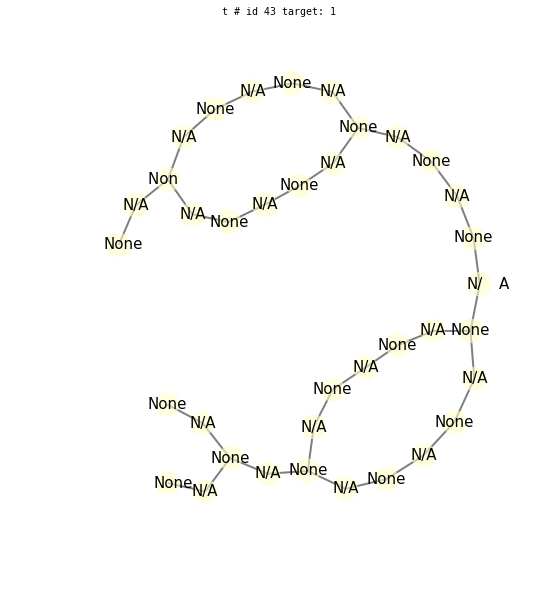

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



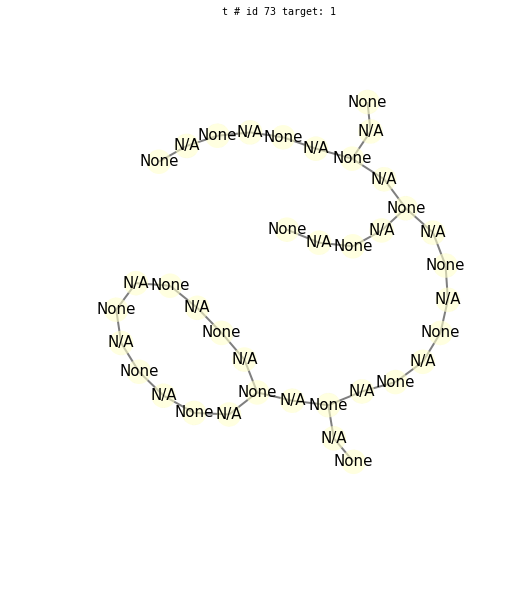

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



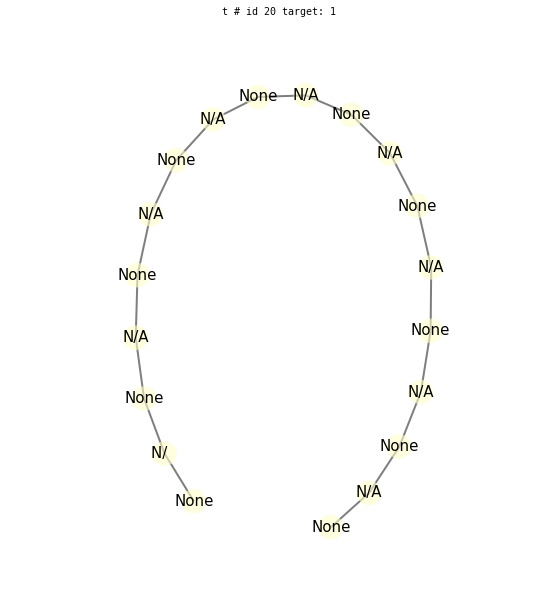

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



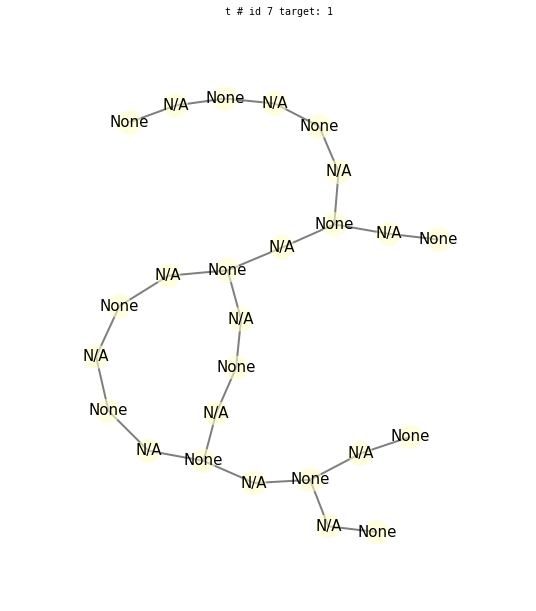

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



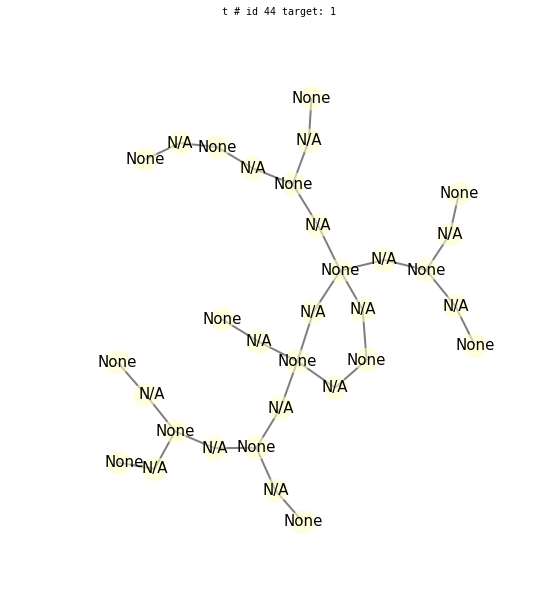

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



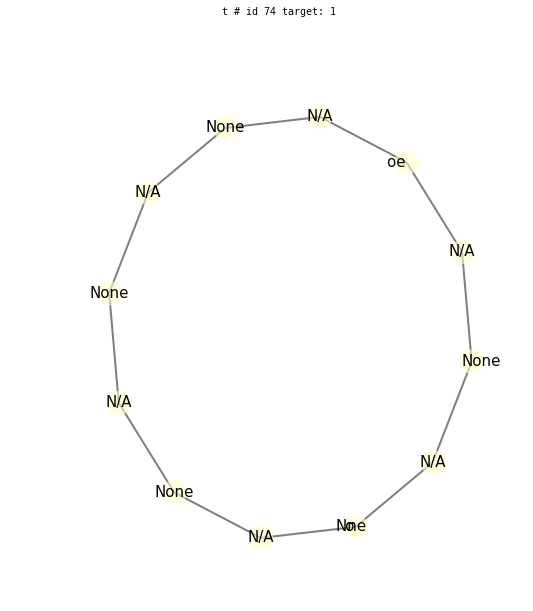

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



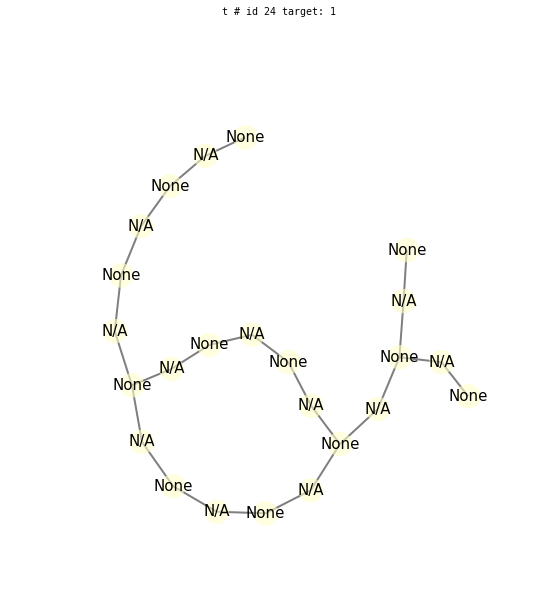

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



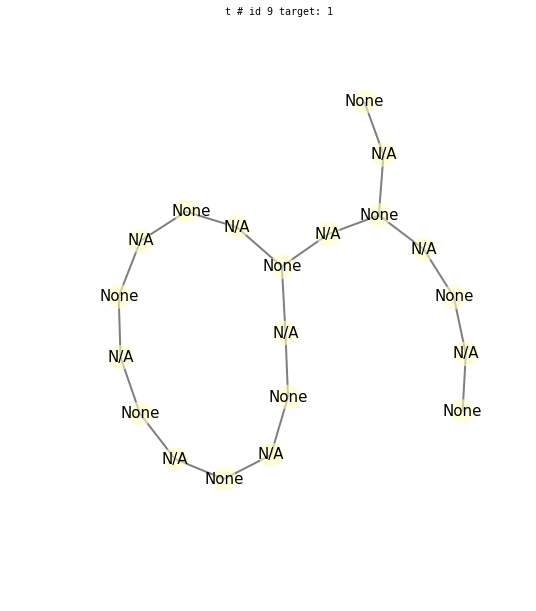

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



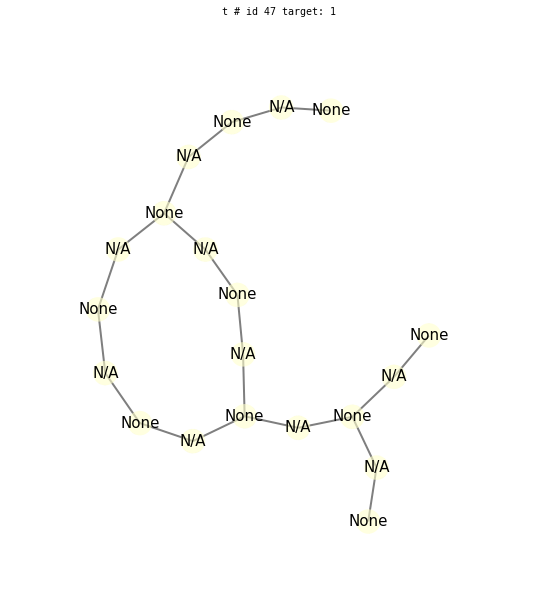

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



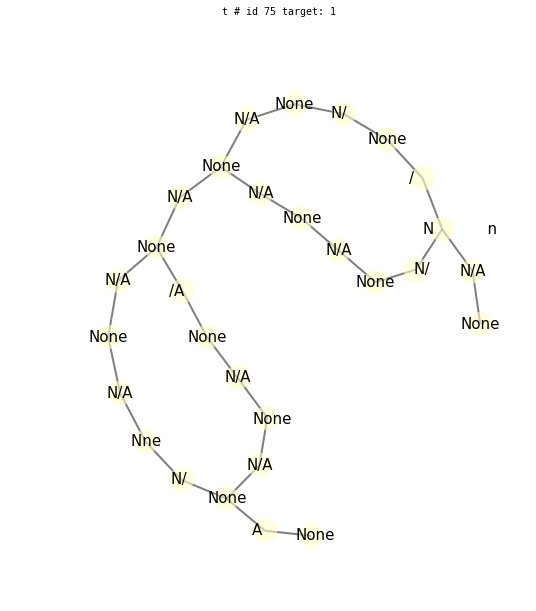

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



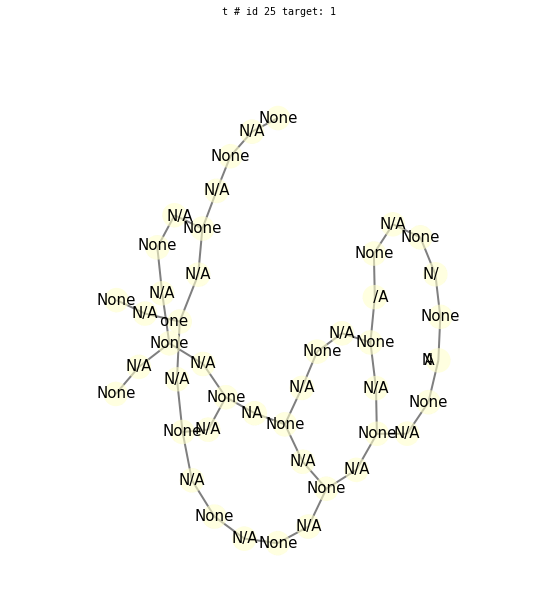

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



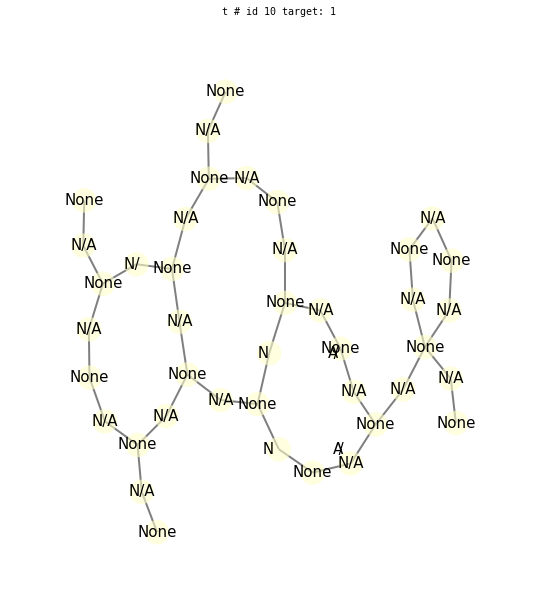

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



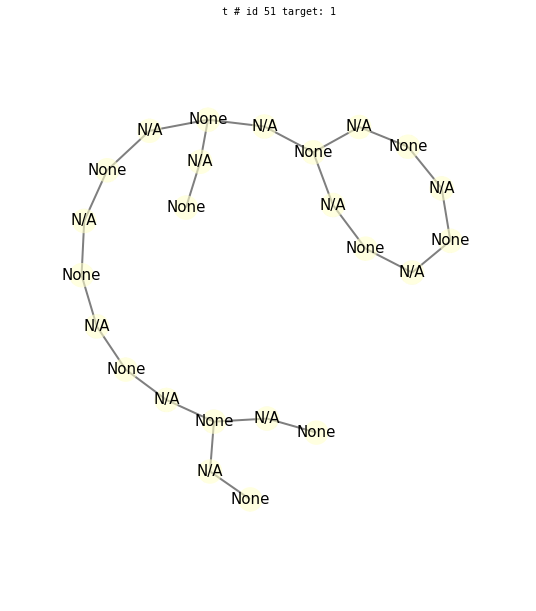

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



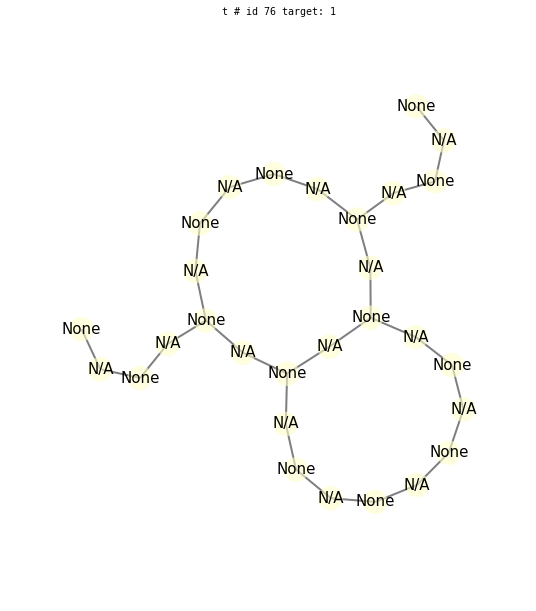

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



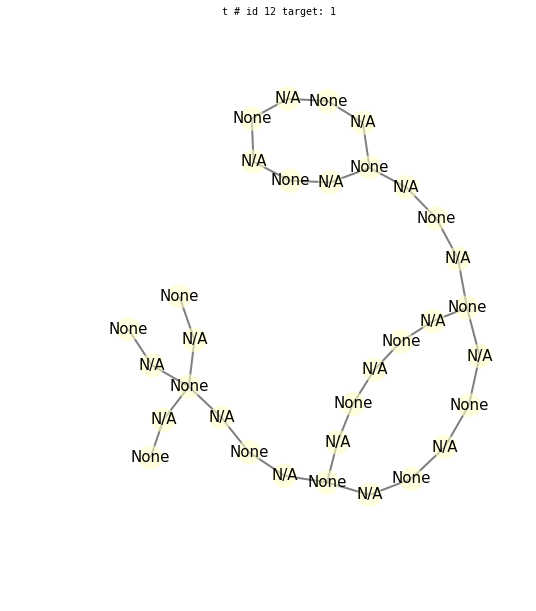

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



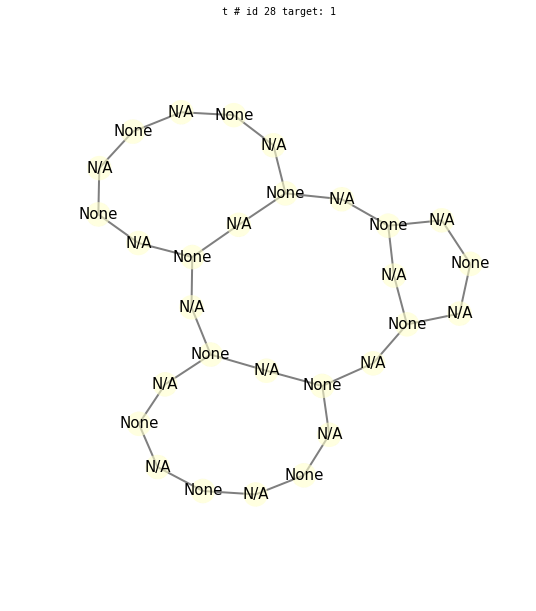

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



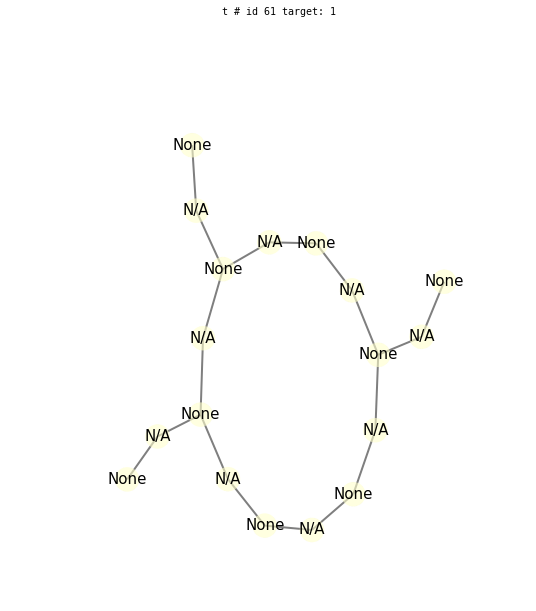

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



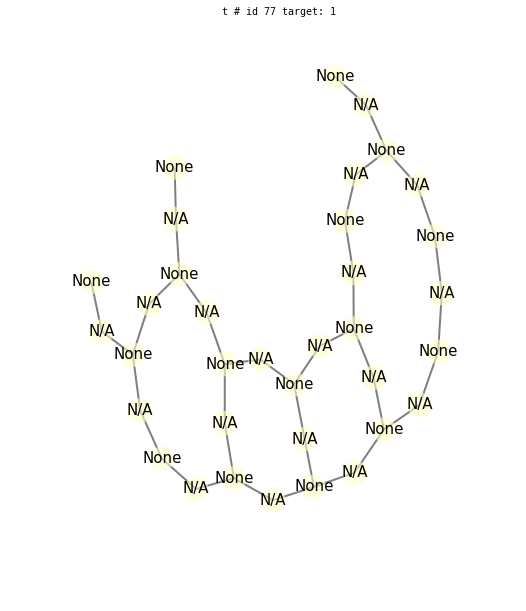

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



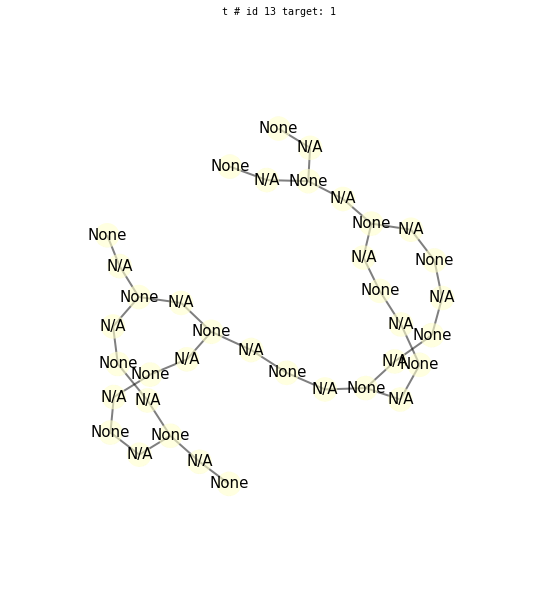

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



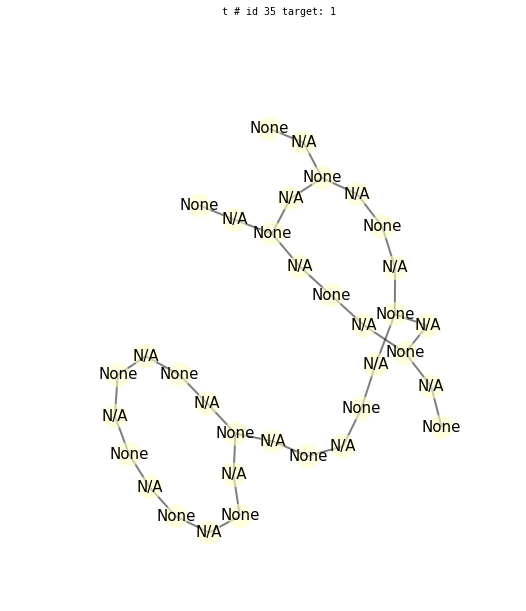

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



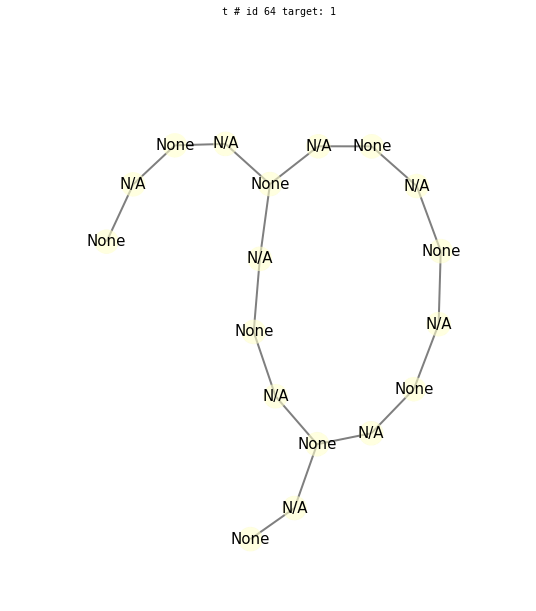

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



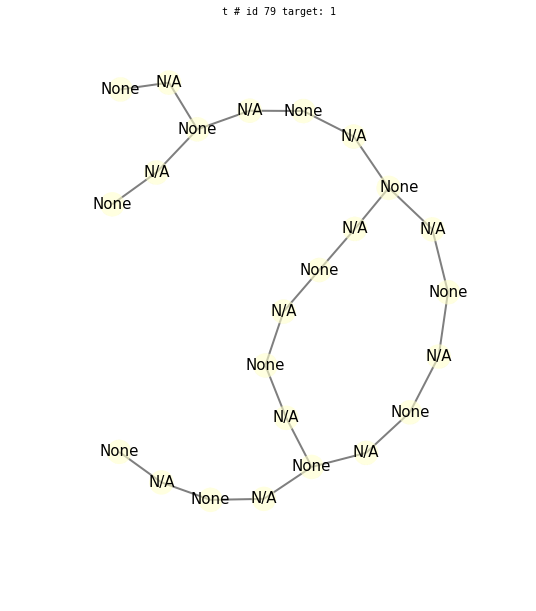

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



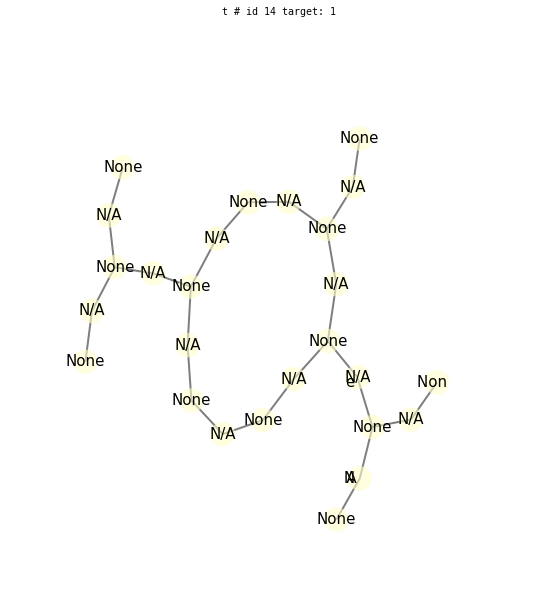

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



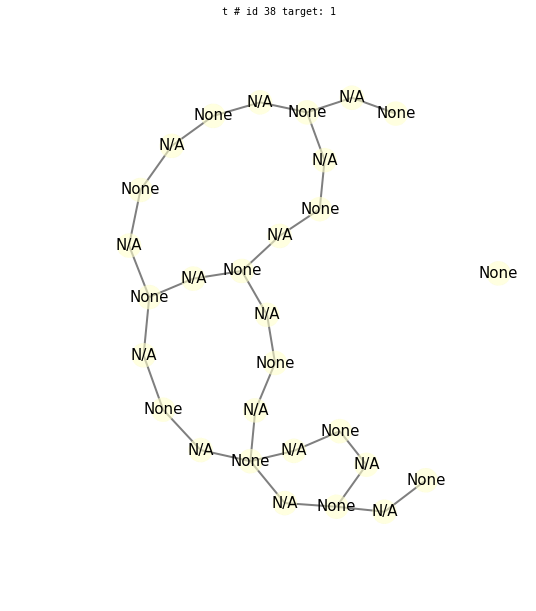

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



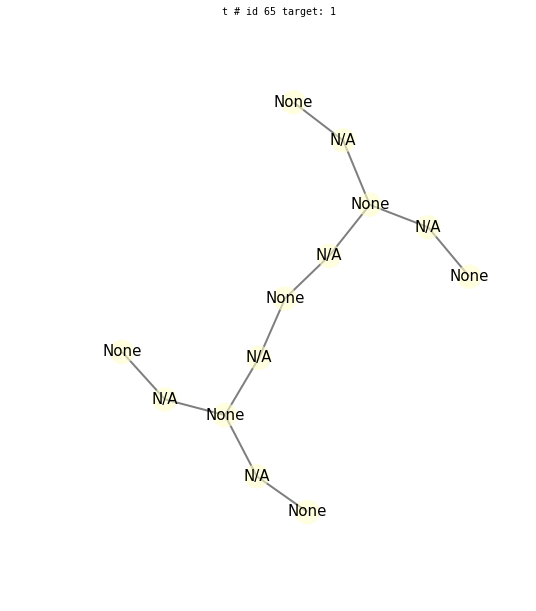

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



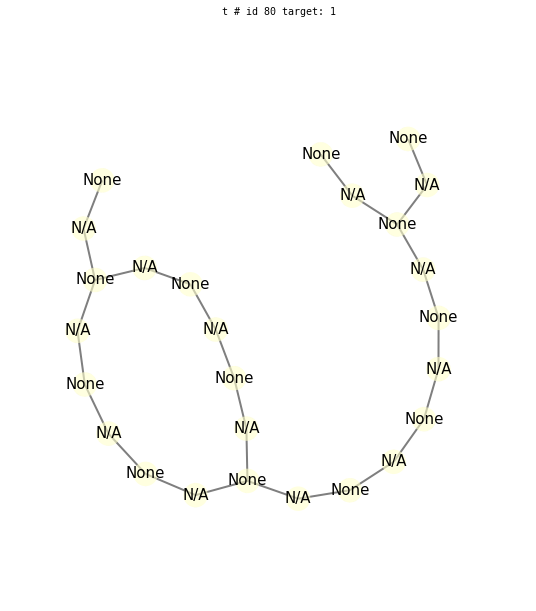

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



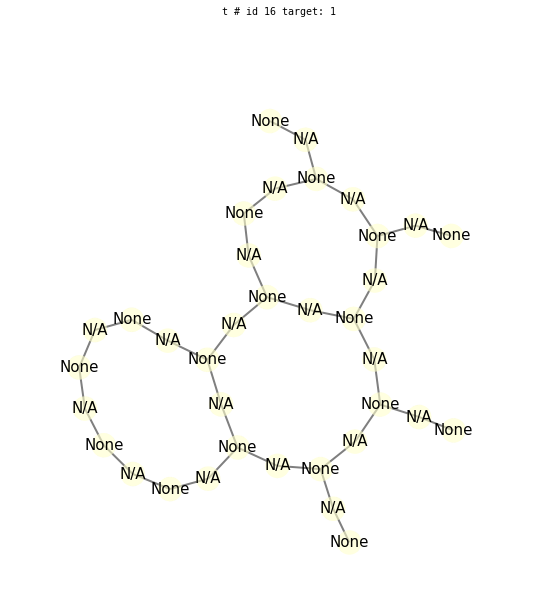

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



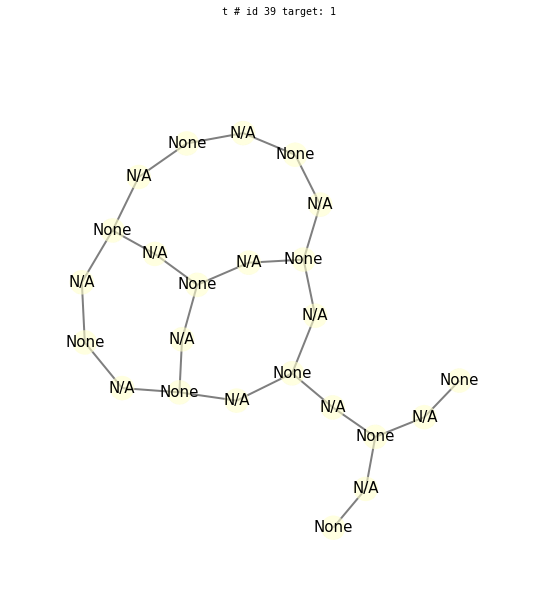

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



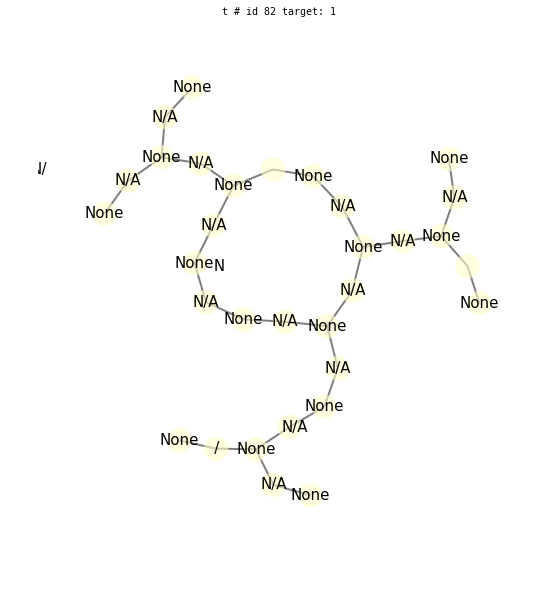

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



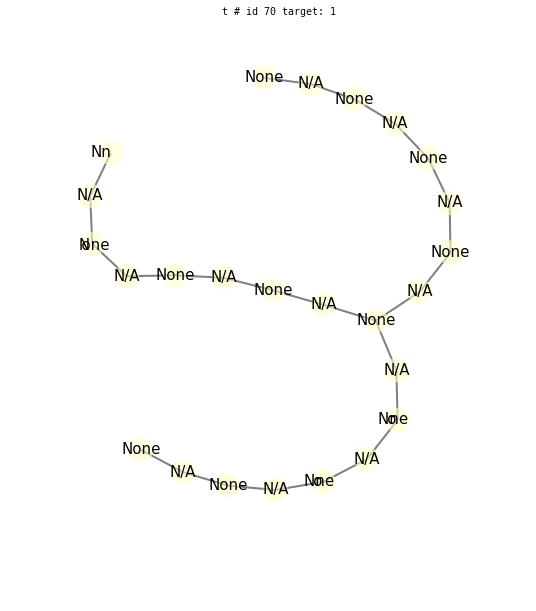

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



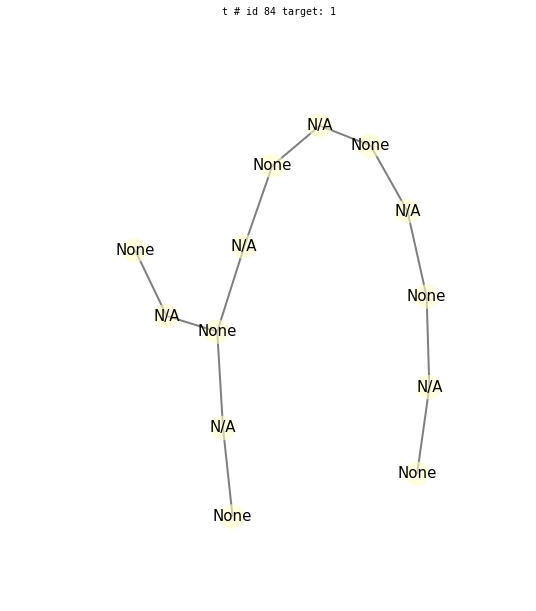

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



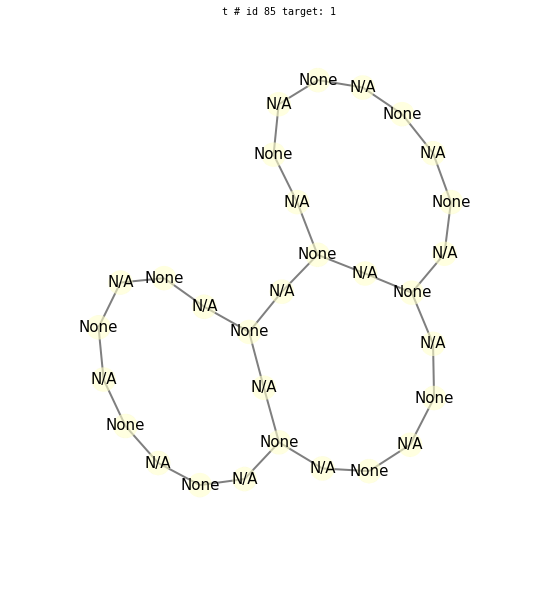

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



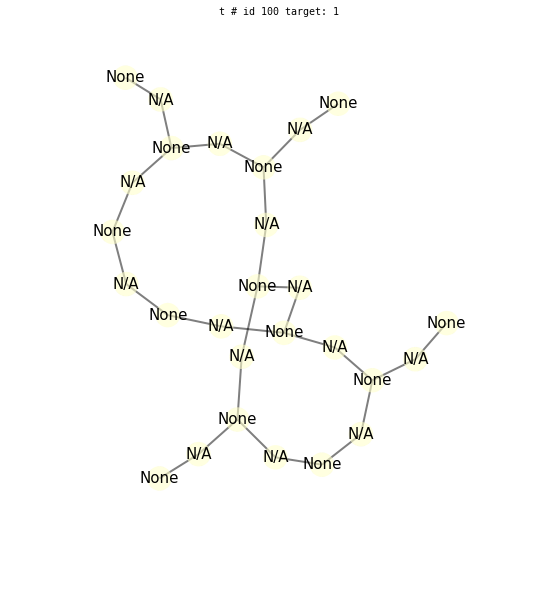

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



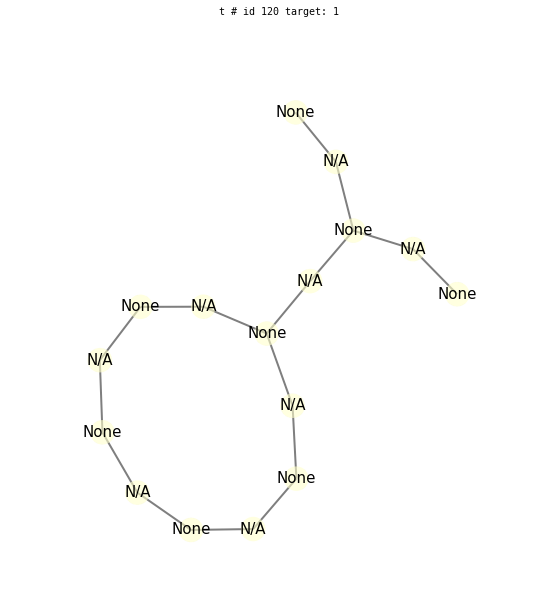

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



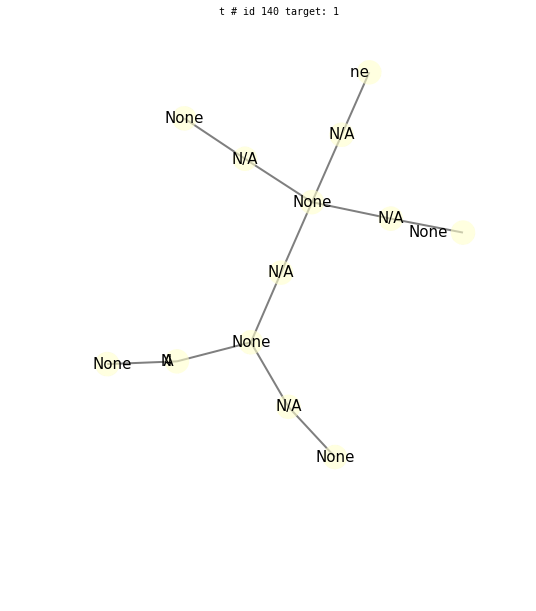

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



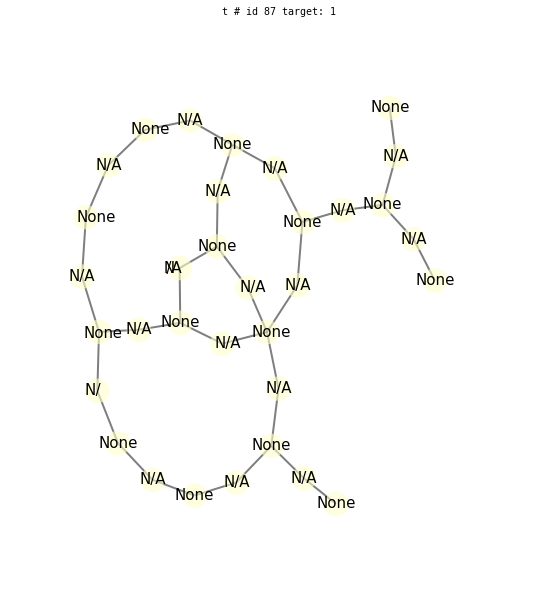

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



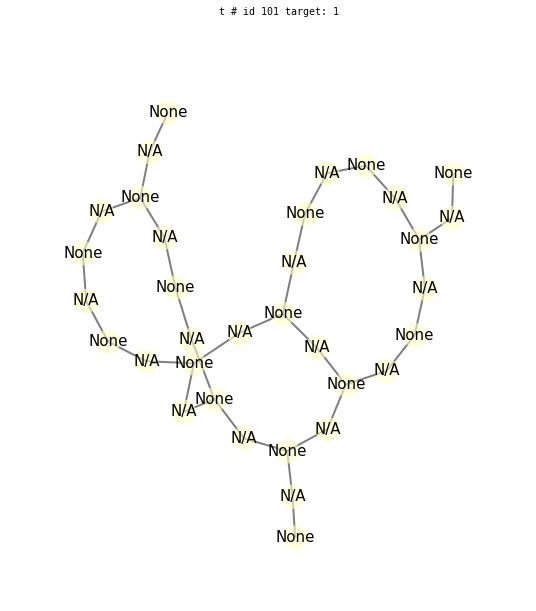

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



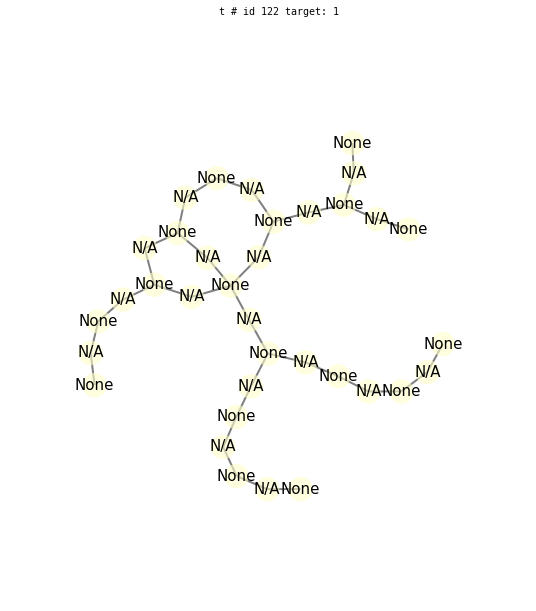

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



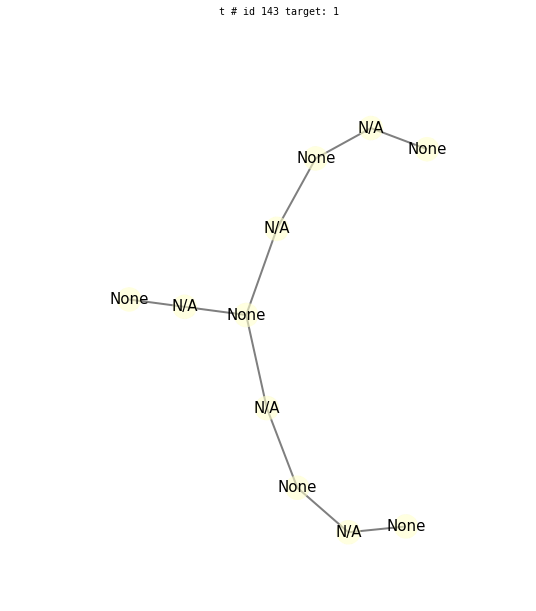

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



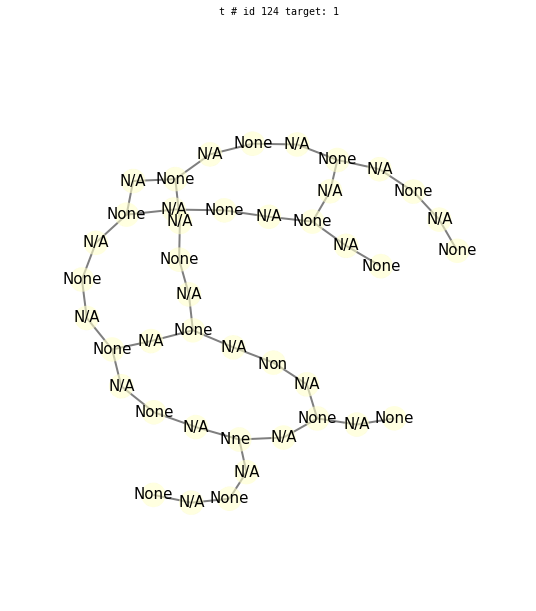

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



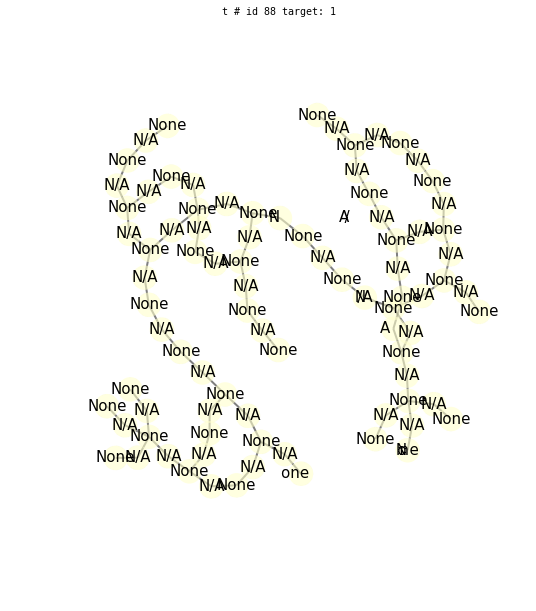

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



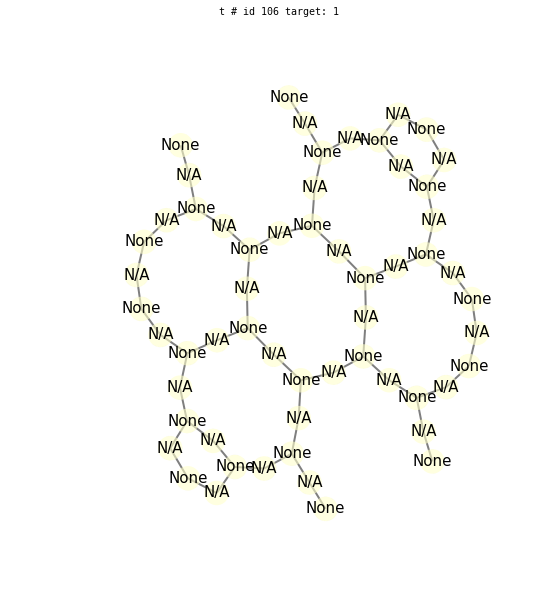

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



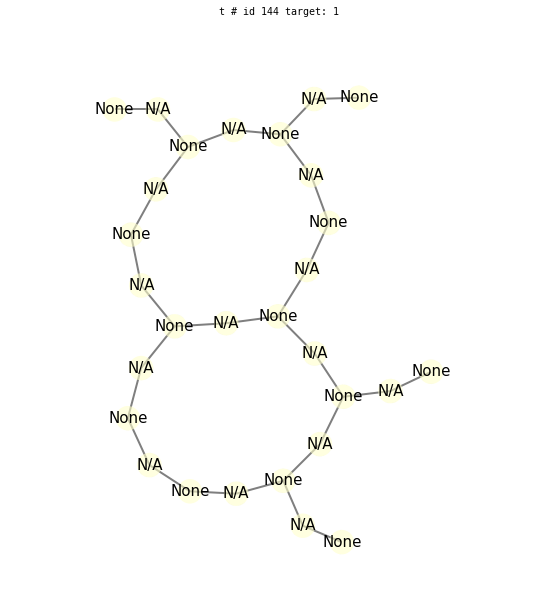

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



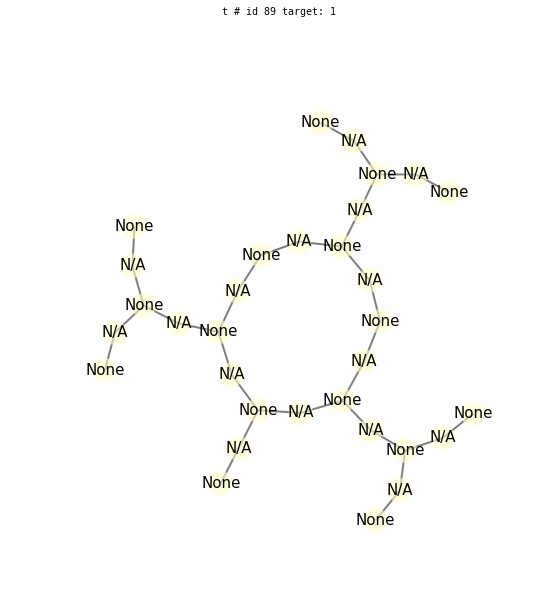

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



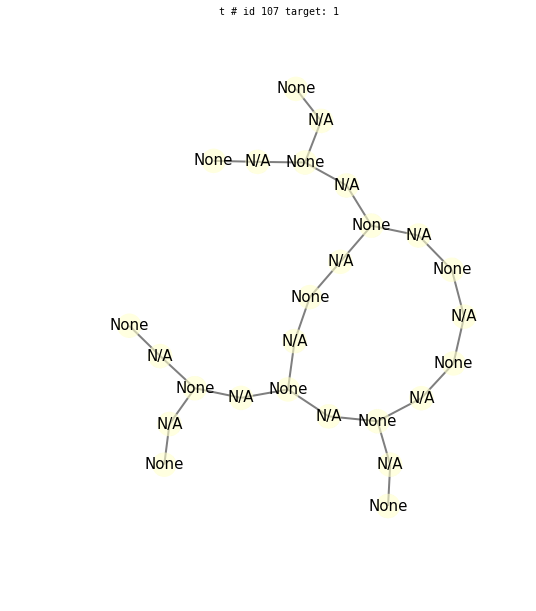

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



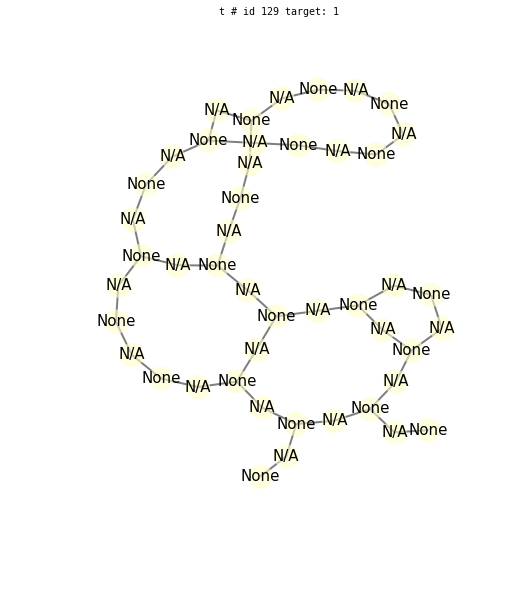

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



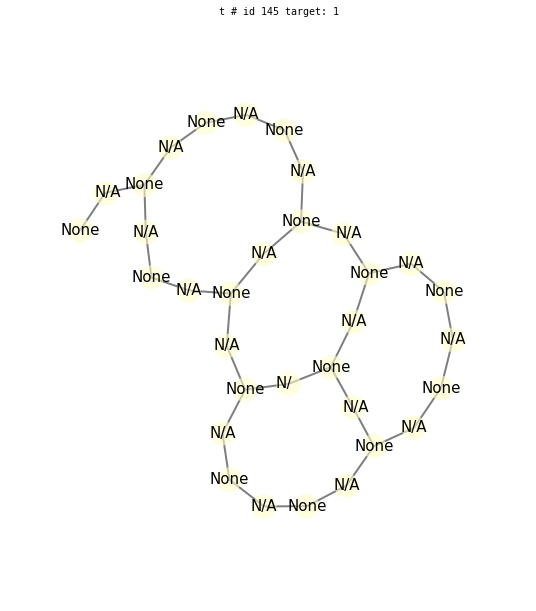

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



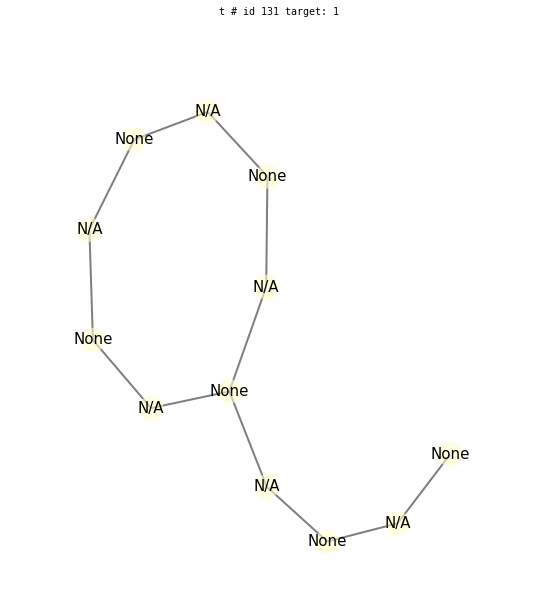

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



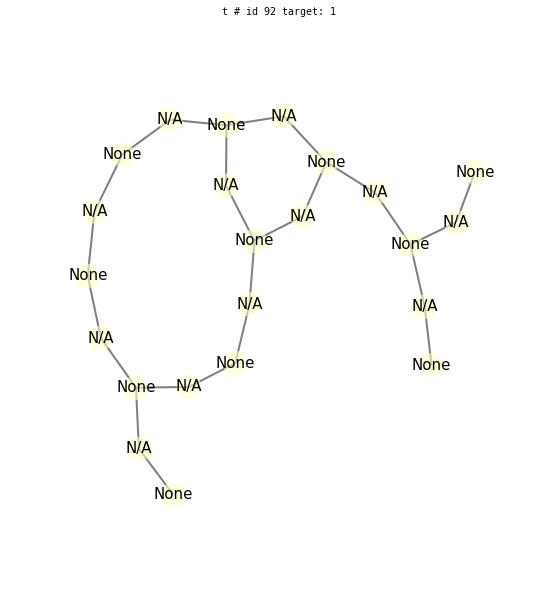

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



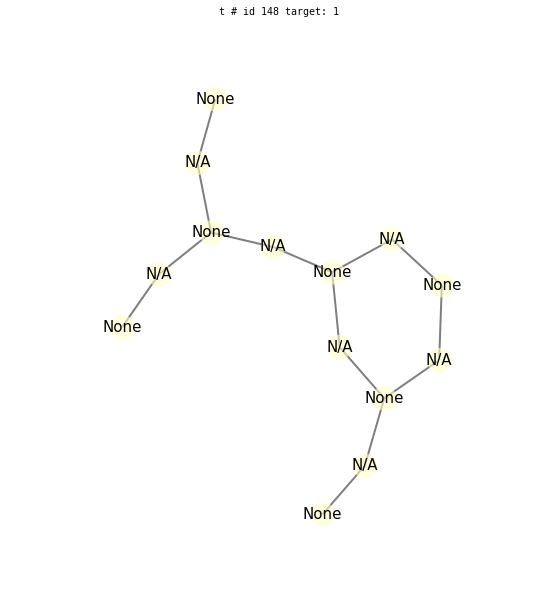

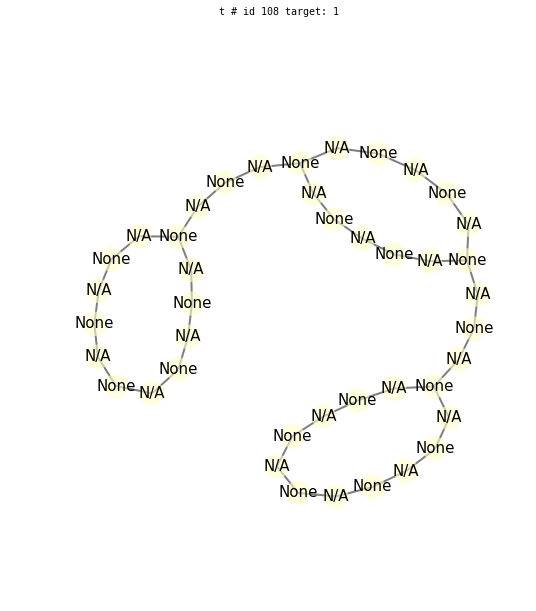

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfa

Process PoolWorker-892:
Process PoolWorker-891:
Traceback (most recent call last):
Process PoolWorker-890:
Traceback (most recent call last):
Process PoolWorker-889:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)


Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfa

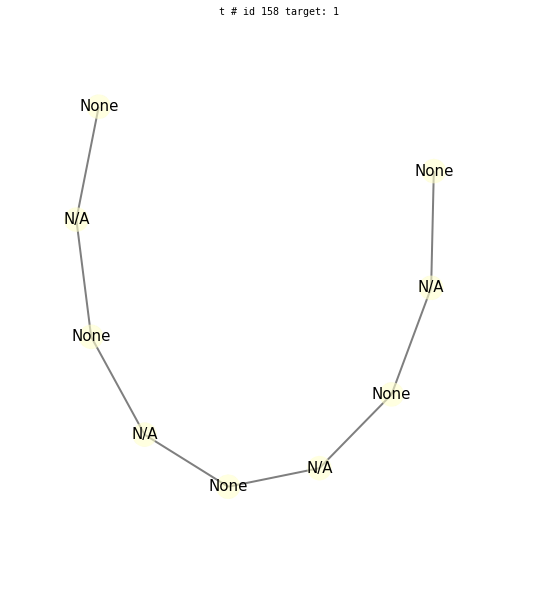

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfa

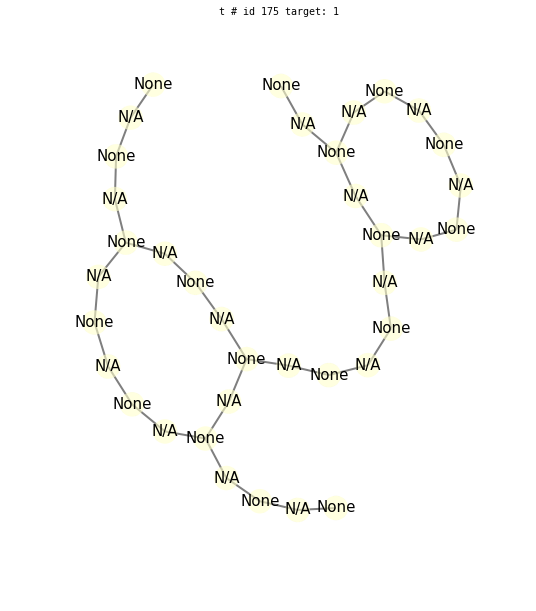

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



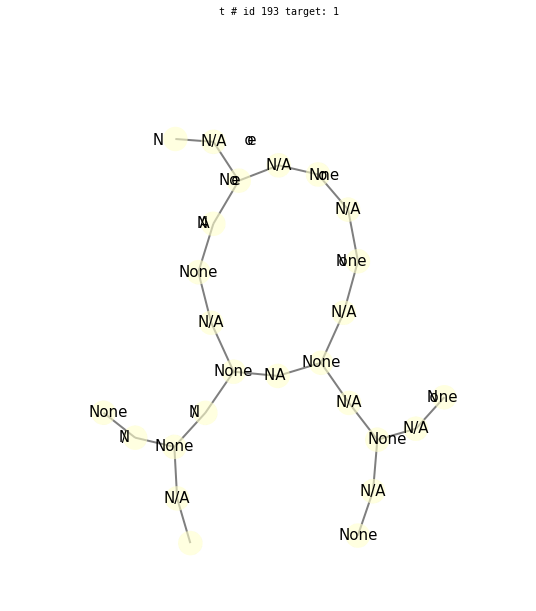

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



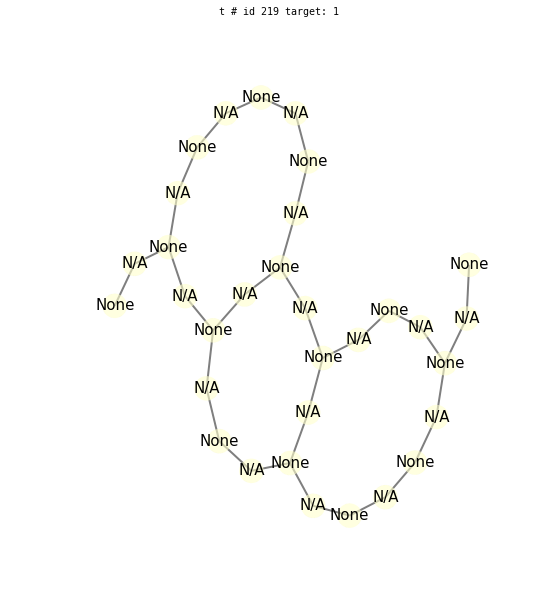

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



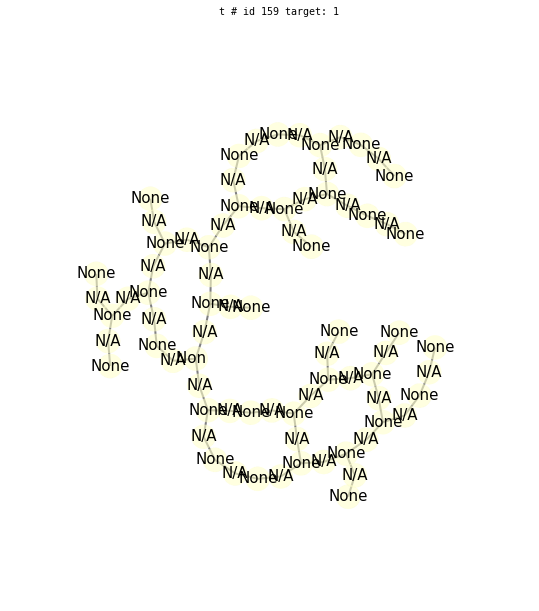

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



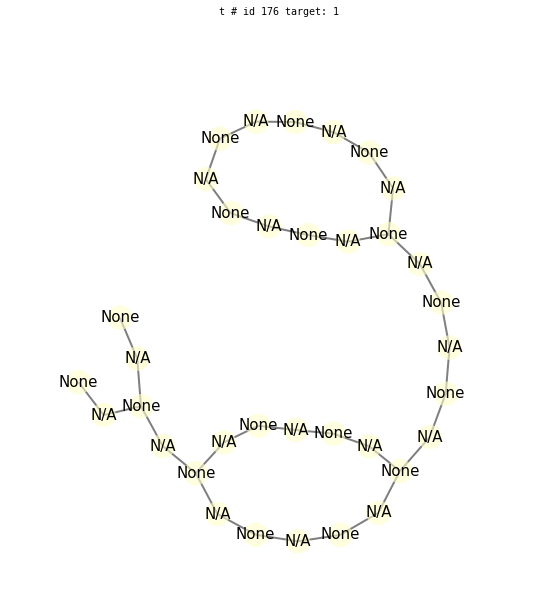

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



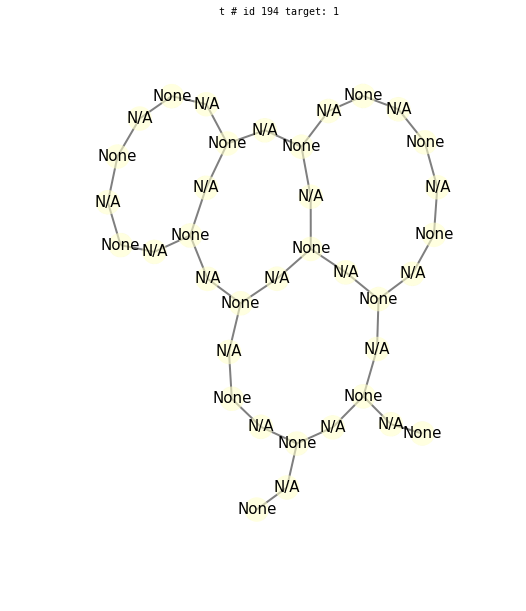

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



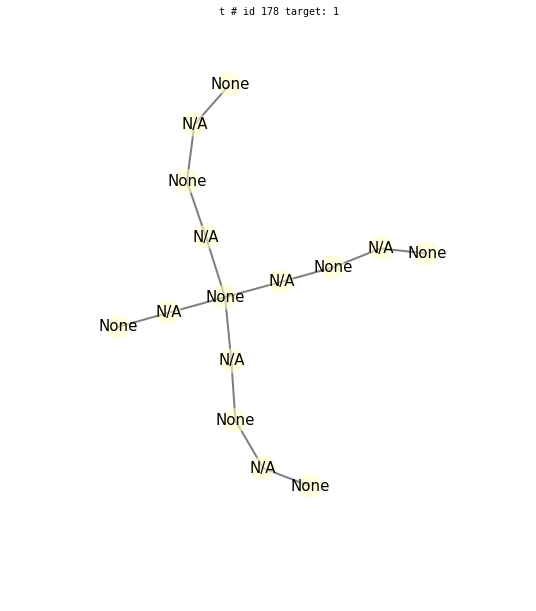

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



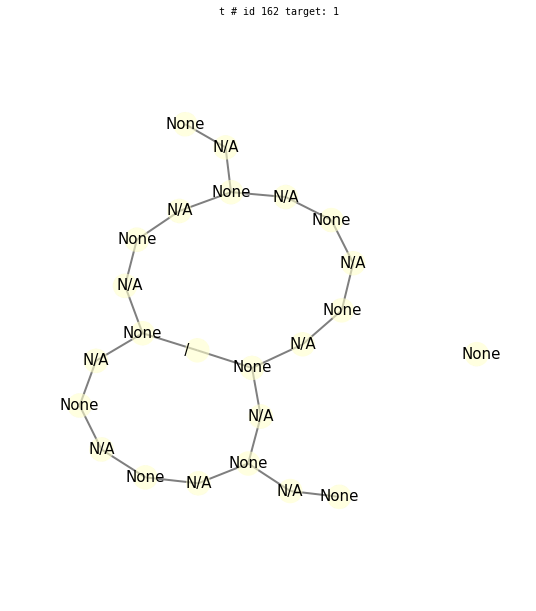

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



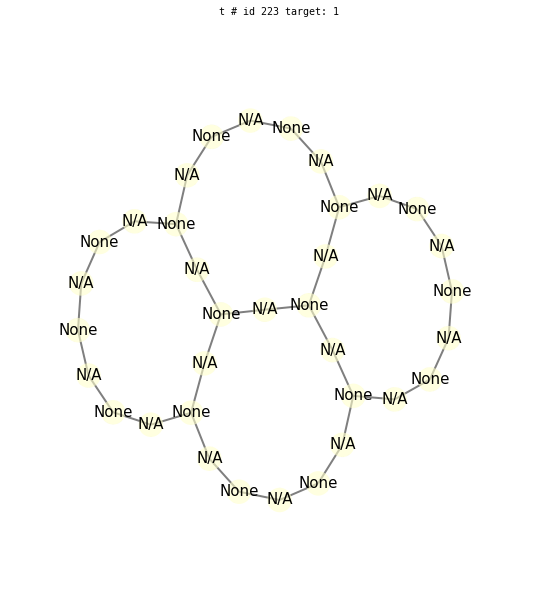

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



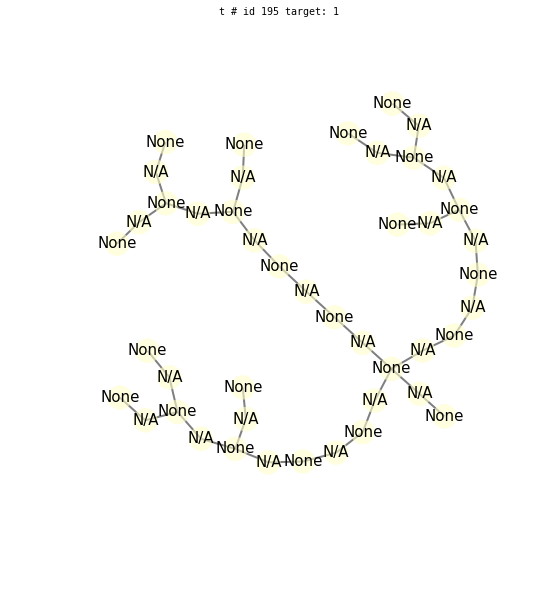

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



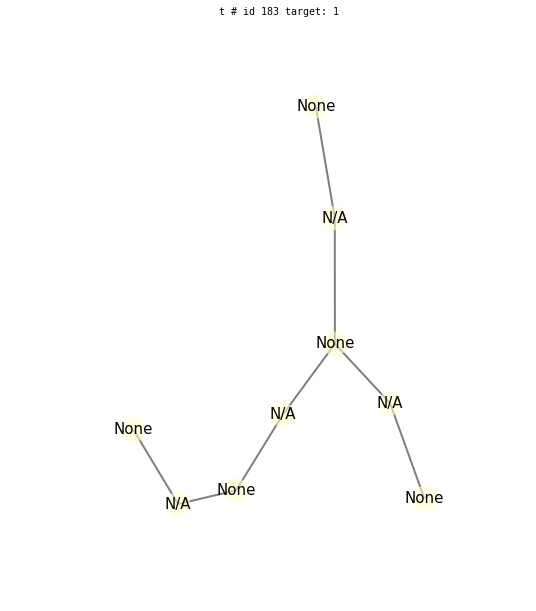

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



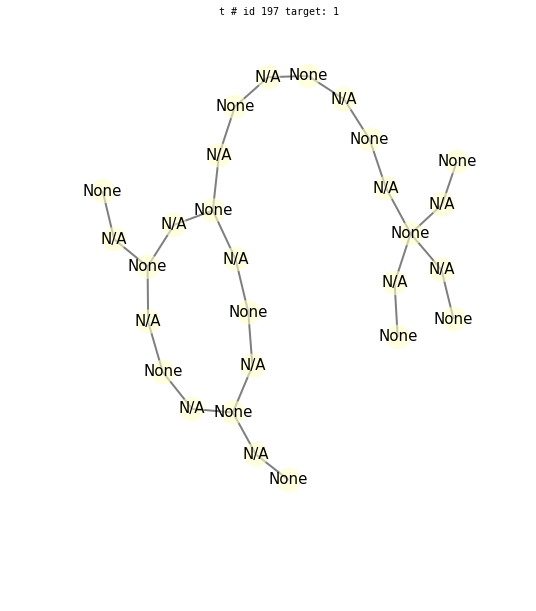

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



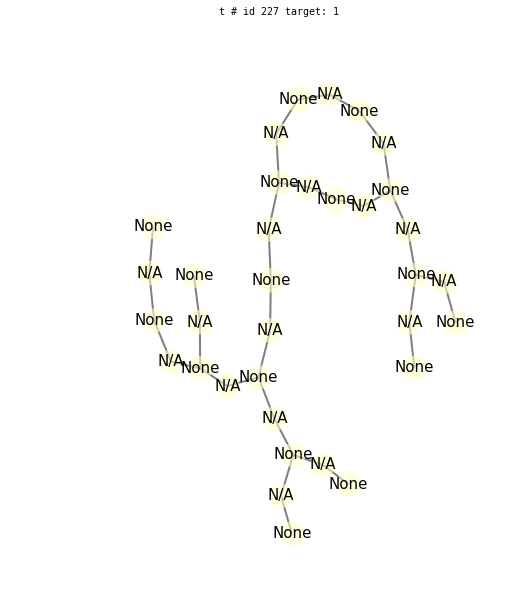

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



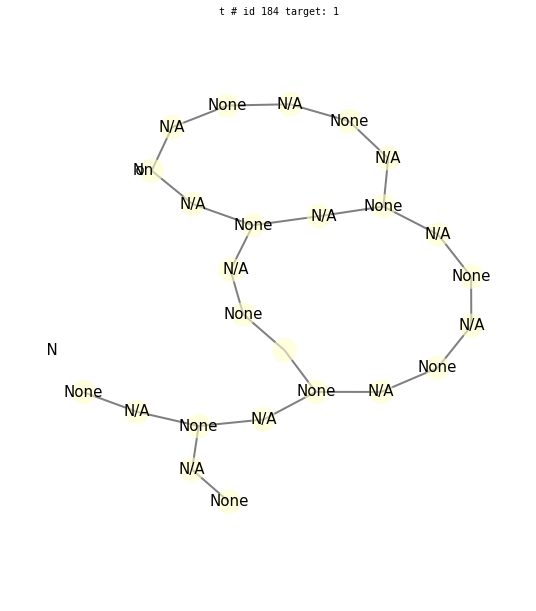

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



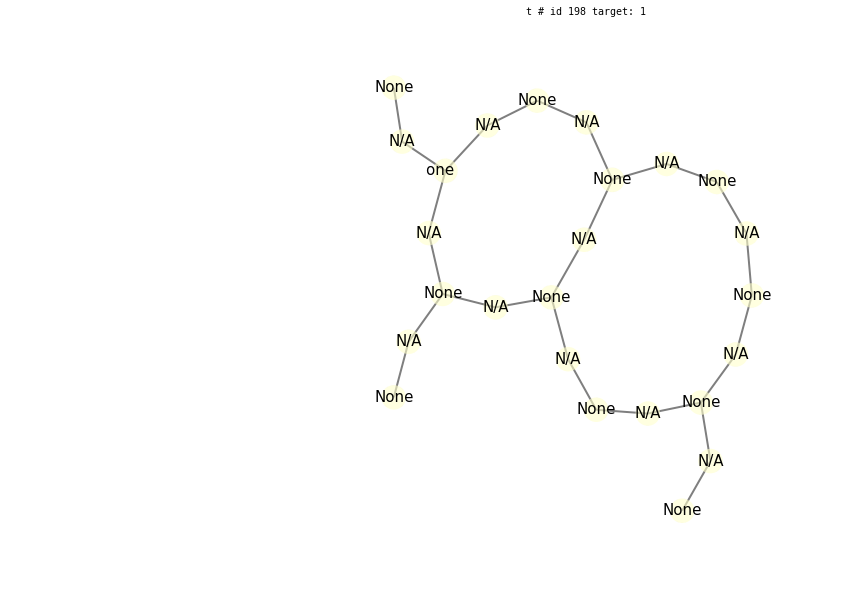

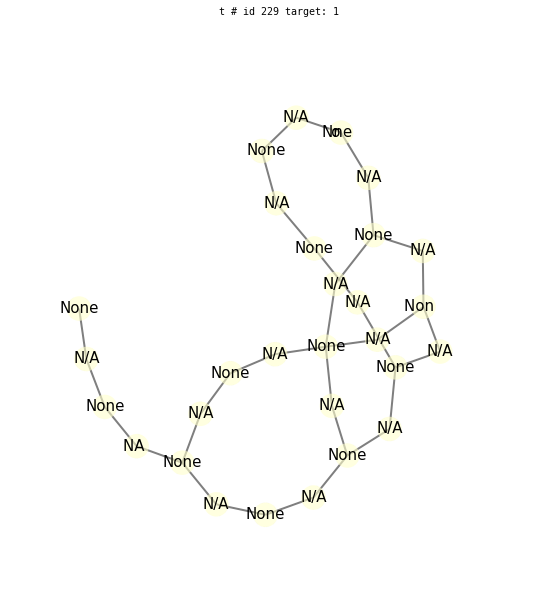

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfa

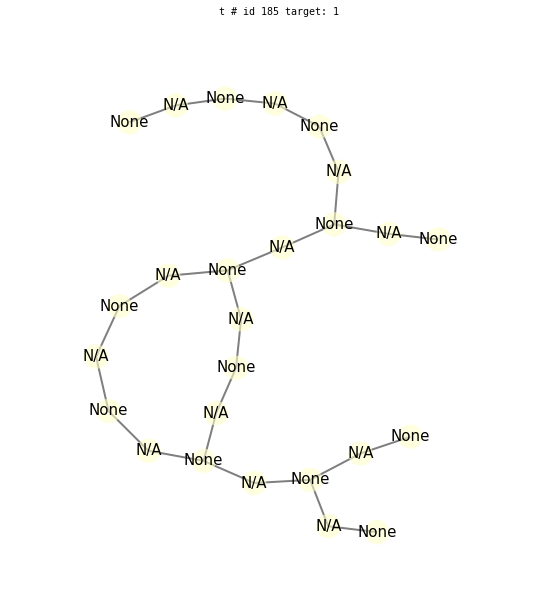

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



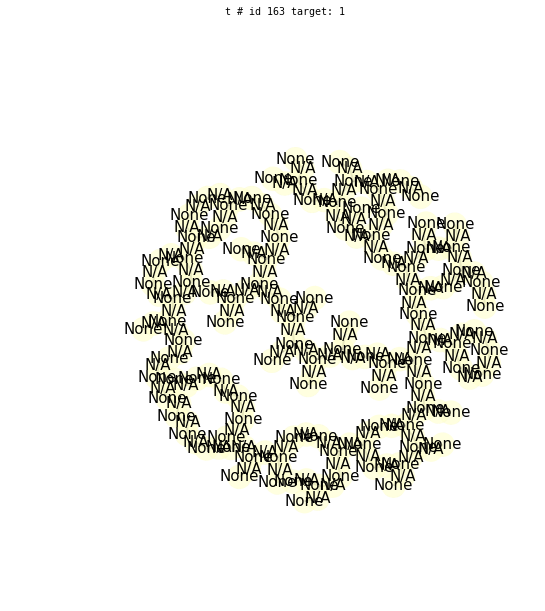

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



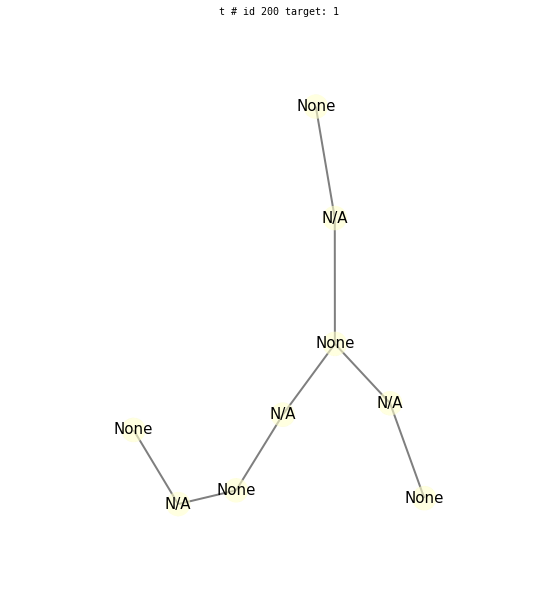

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



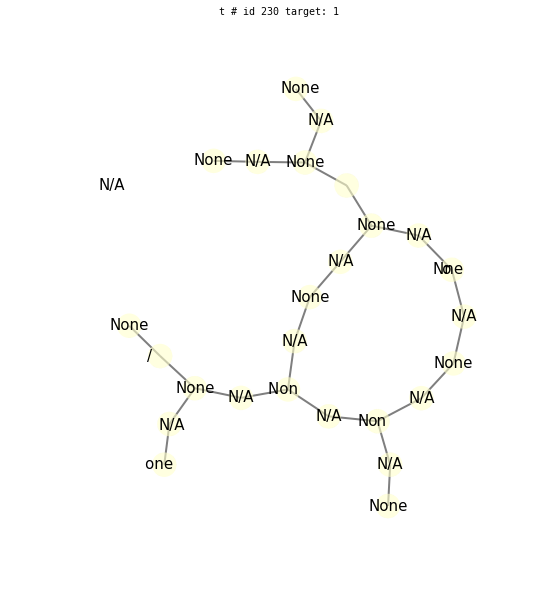

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



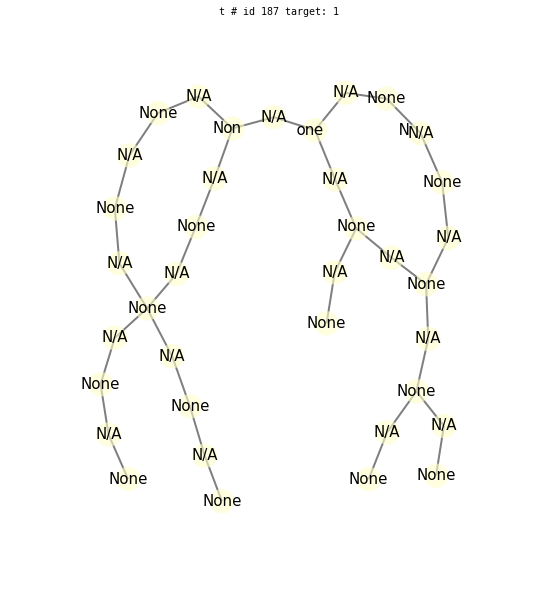

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



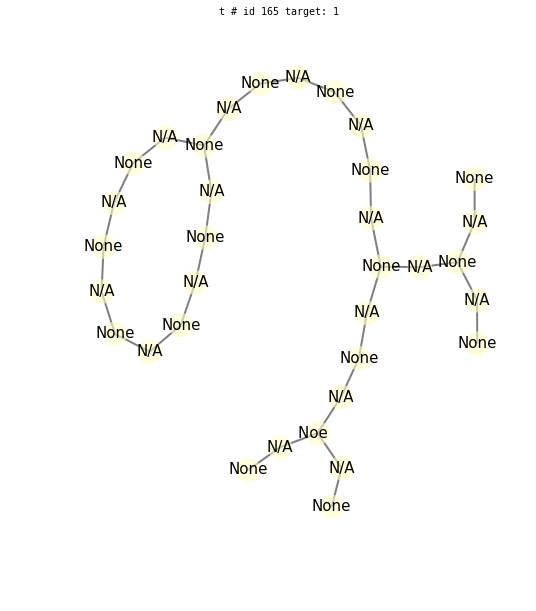

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



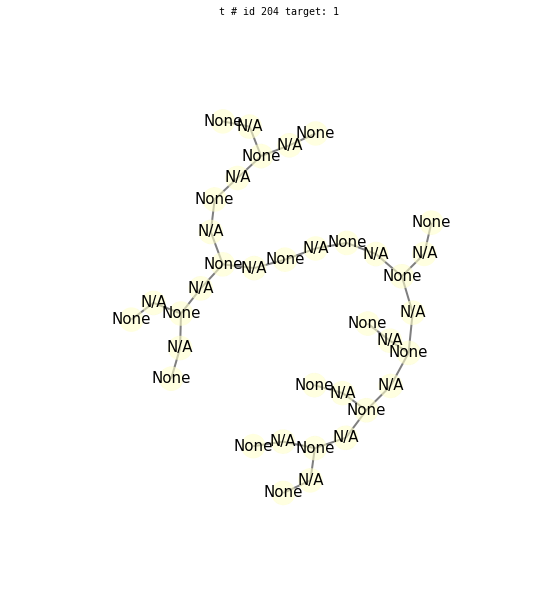

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



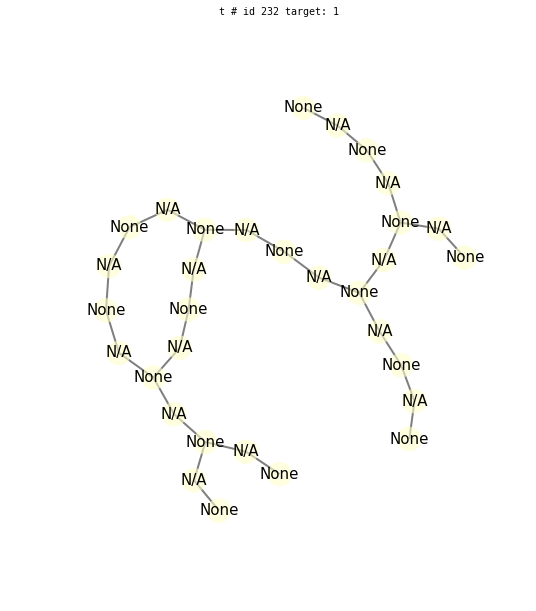

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



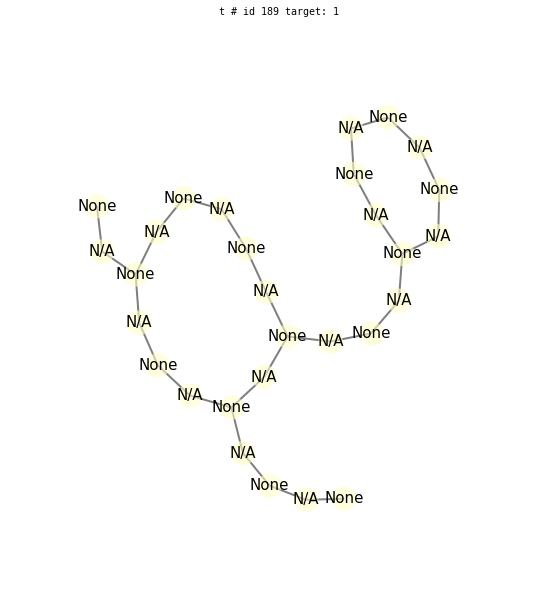

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



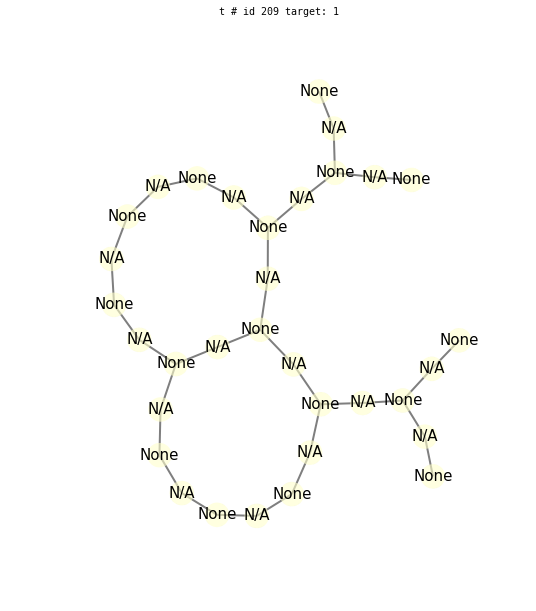

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



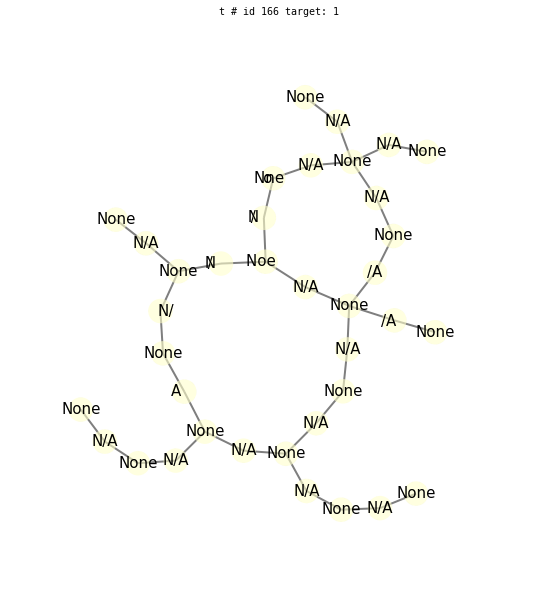

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



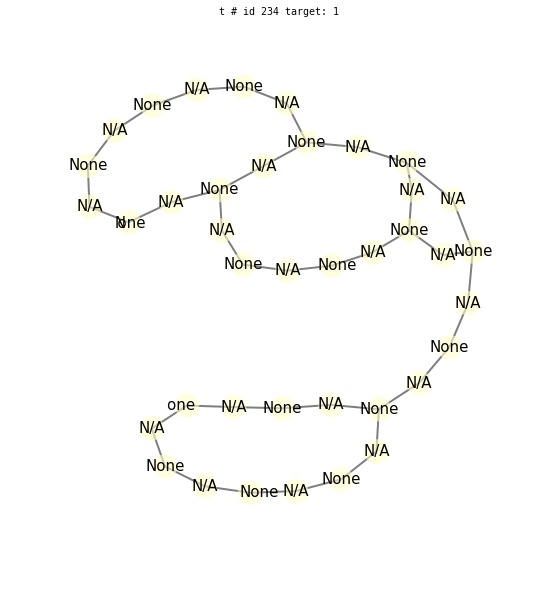

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



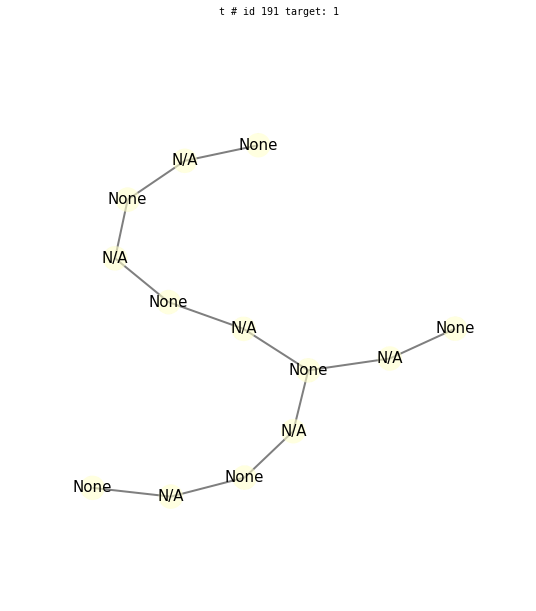

Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/localsubstitutablegraphgrammar.py", line 383, in extract_cores_and_interfaces
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 338, in all_core_interface_pairs
    thickness_list=thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 304, in rooted_core_interface_pairs
    node_filter=self.node_entity_check)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 560, in extract_cips
    base_copy, mergeids = merge_core(base_graph.copy(), abstract_graph, abstract_cip)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line 652, in merge_core
    exit()
NameError: global name 'exit' is not defined



KeyboardInterrupt: 

In [9]:
from graphlearn.graphlearn import Sampler as graphlearn_sampler
from graphlearn.learnedlayer import transform
graphs = get_graphs(size=200)
import graphlearn.minor.decompose as decompose

sampler=graphlearn_sampler(
            decomposer=decompose.MinorDecomposer(),
            graphtransformer=transform.GraphMinorTransformer(group_score_threshold=0.4,num_classes=1,debug=False),
            n_samples=5,
     
            batch_size=1,
            n_steps=50,
            n_jobs=1,
            quick_skip_orig_cip=False,
            core_choice_byfrequency=True,
            burnin=0,
            improving_threshold_fraction=0.5,
            select_cip_max_tries=100,
            keep_duplicates=True,
            monitor=True,
            include_seed=True)

sampler.fit(graphs)
print 'done'

# Inspect the induced grammar

The first graph in each line shows the minor graph of the first CIP.
note that the minor-interfacegraph is the same for all CIPs, while the minor-core might be different.

interface id: 401440 [4 options]


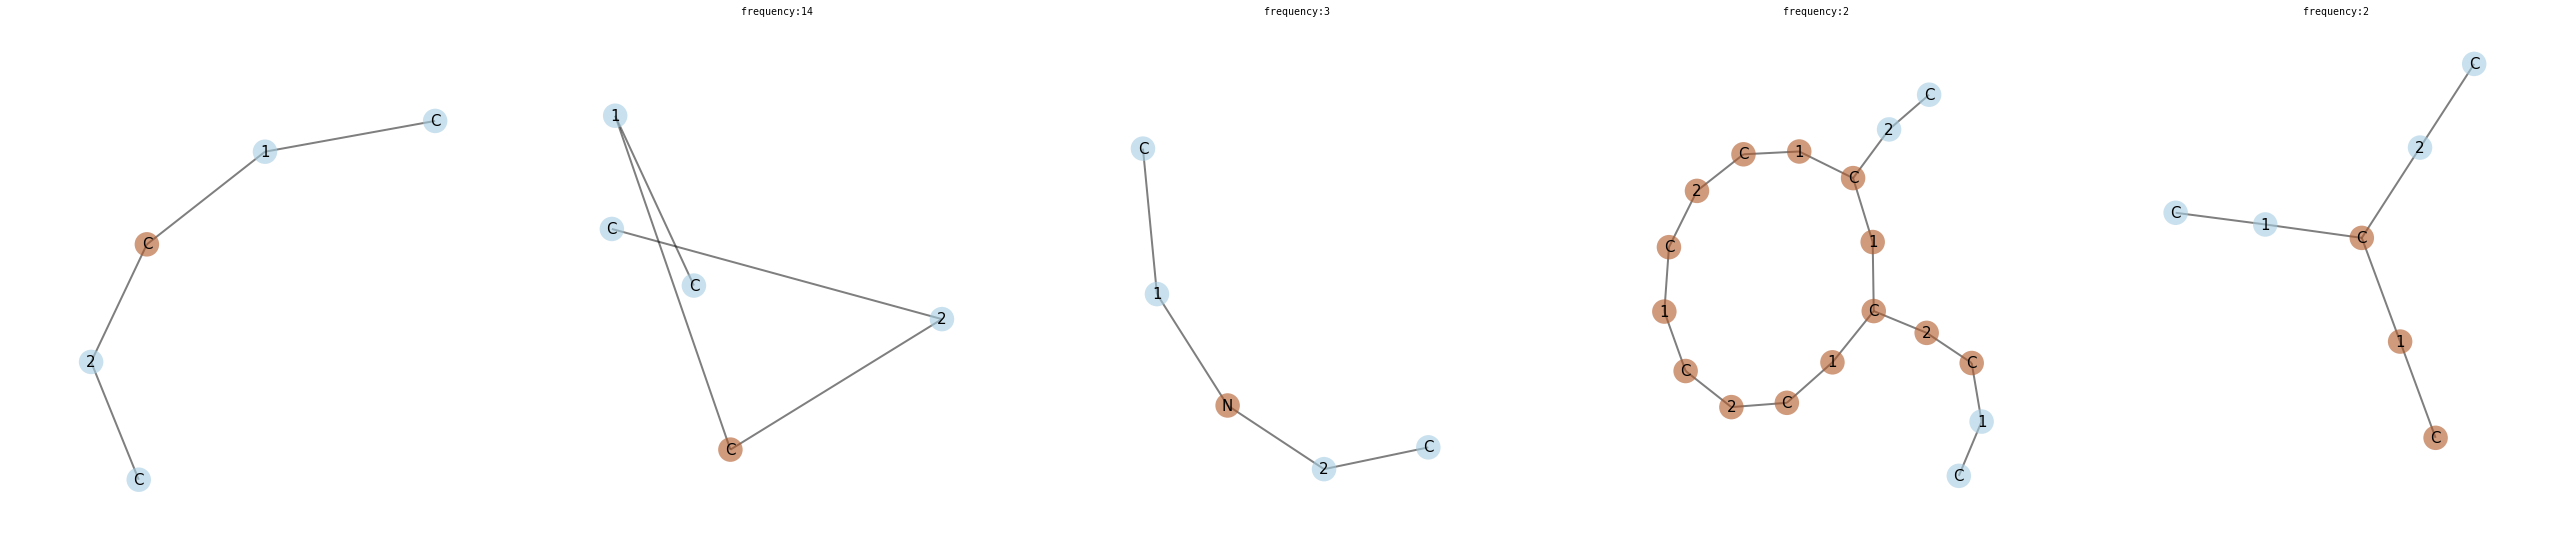

interface id: 881050 [2 options]


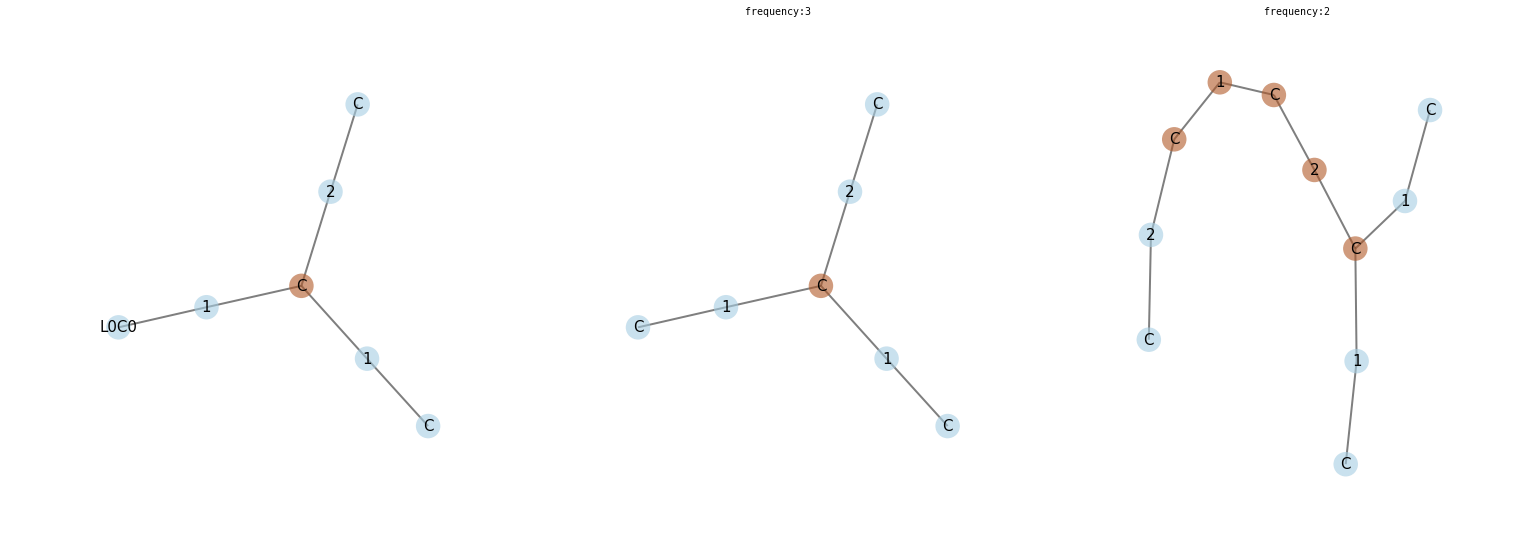

interface id: 502048 [2 options]


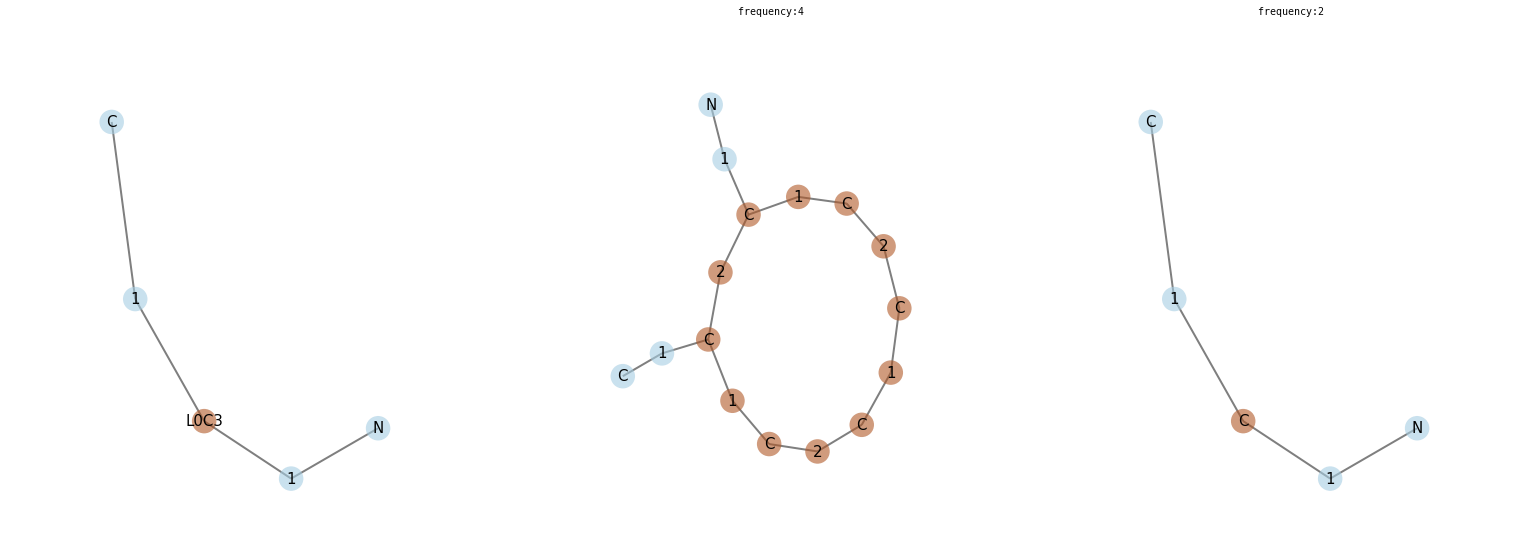

In [5]:
if True:
    draw.draw_grammar(sampler.lsgg.productions,n_productions=3,n_graphs_per_production=5,
                         n_graphs_per_line=5, size=9, contract=False,
                         colormap='Paired', invert_colormap=False,
                         vertex_alpha=0.6, edge_alpha=0.5,  abstract_interface=True)

# sample molecules

Sampling works exactly the same way as before.

In [6]:
import itertools

#parameters
graphs = get_graphs()
id_start=15
id_end=id_start+9
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50


# sampling with many arguments.
graphs = sampler.transform(graphs)

 

preprocessing grammar
'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/min

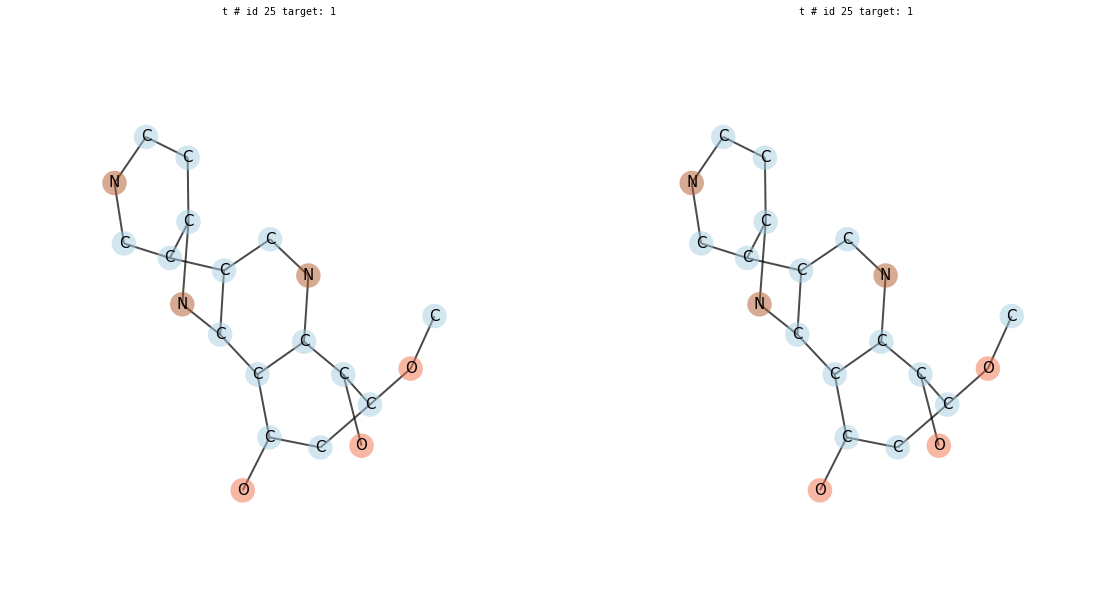

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

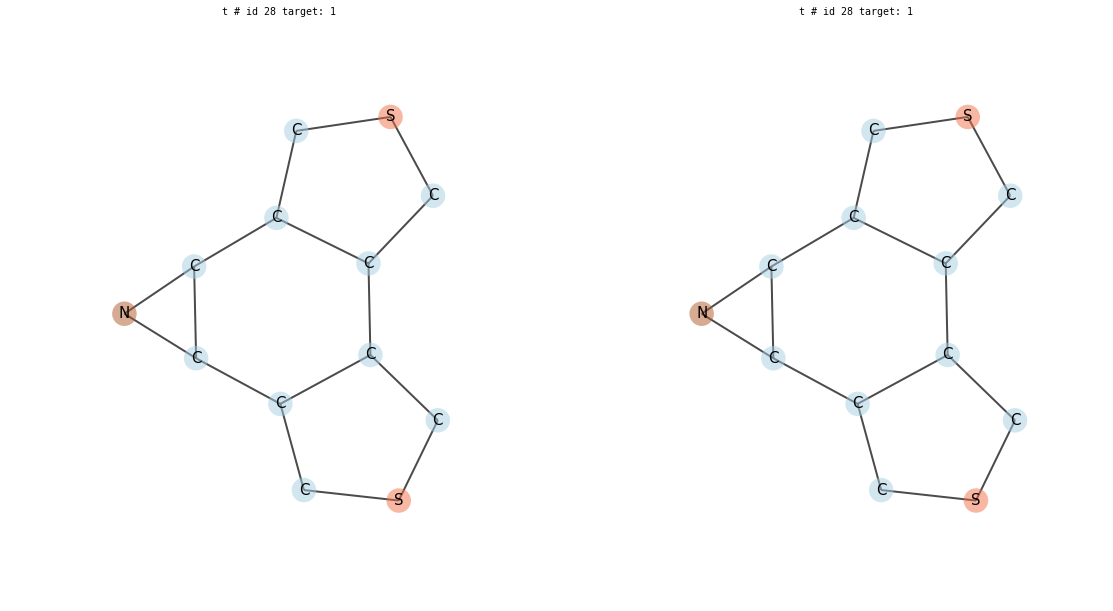

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

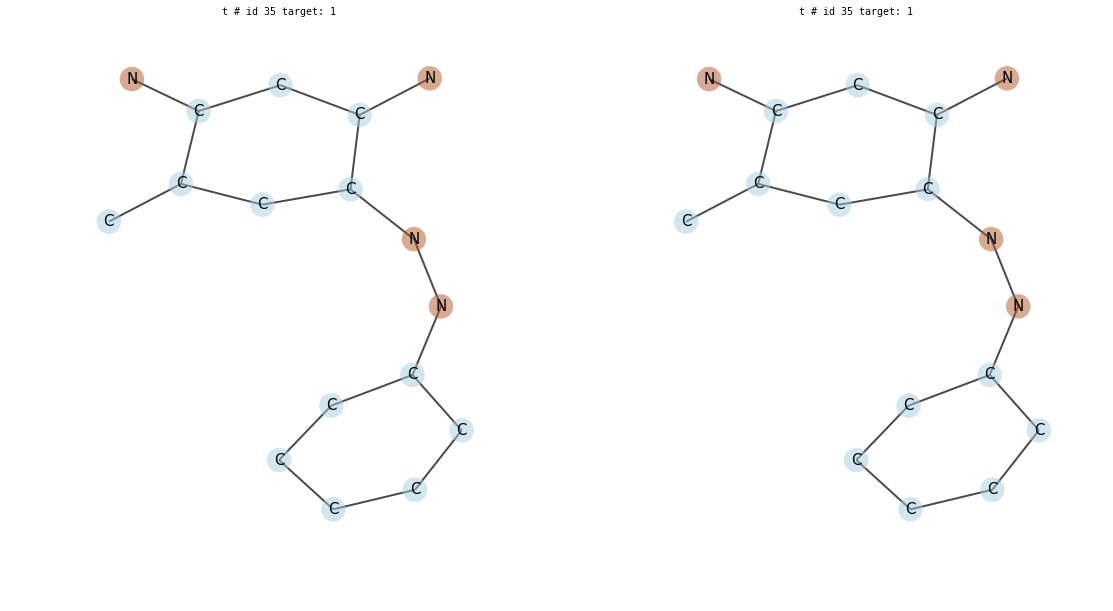

_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0 ; size 35
'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)


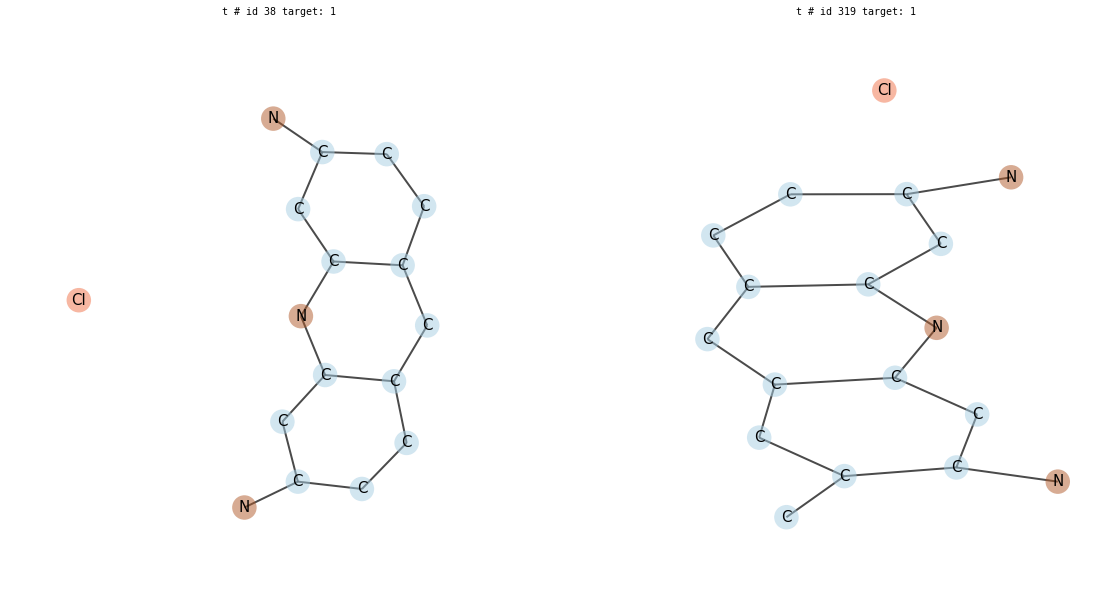

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

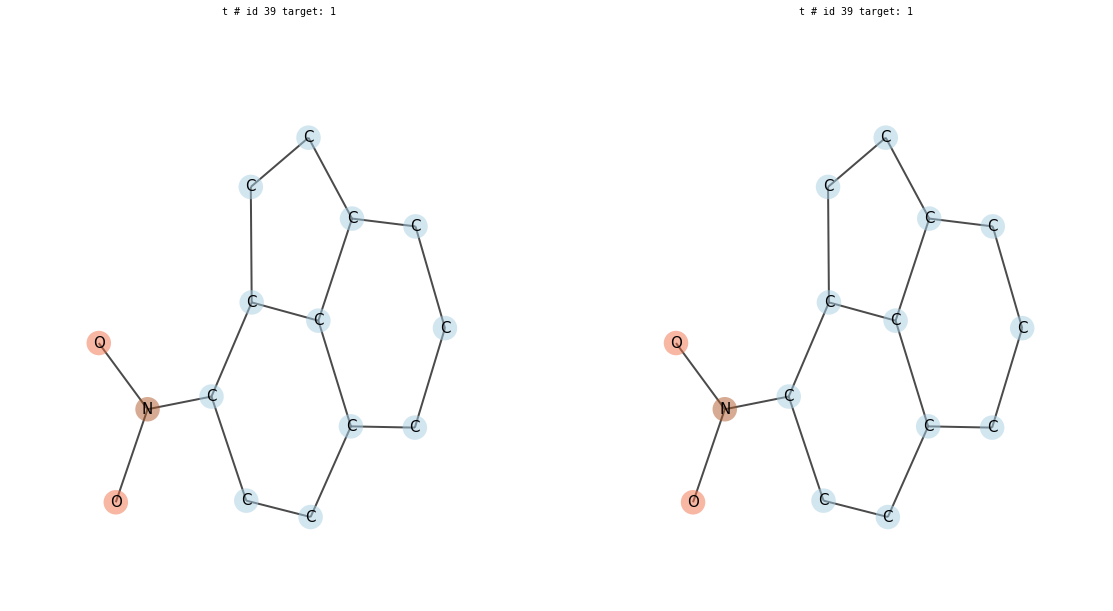

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

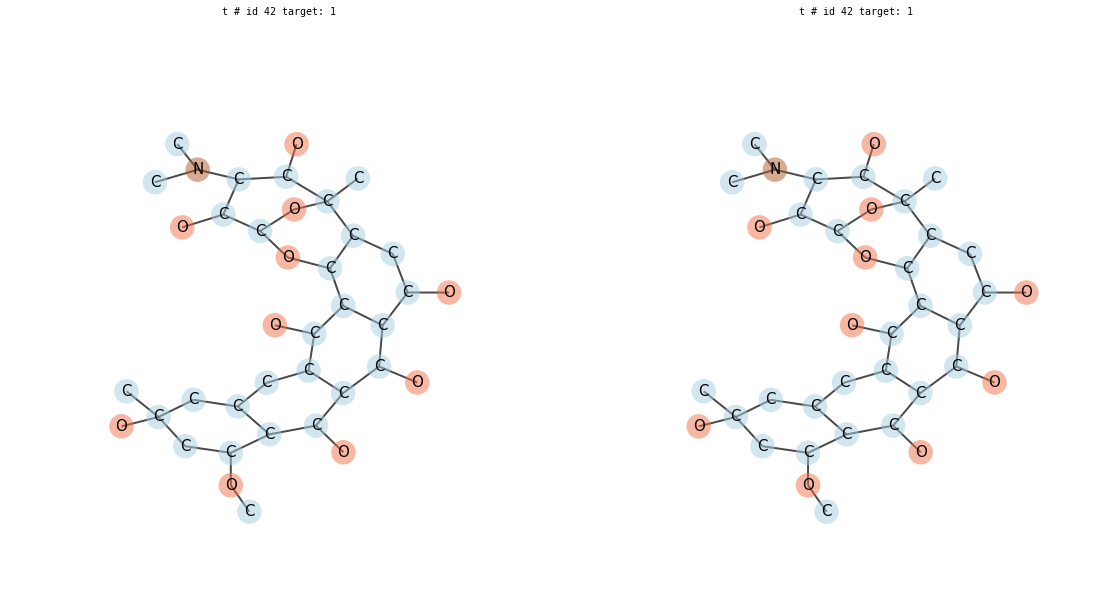

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

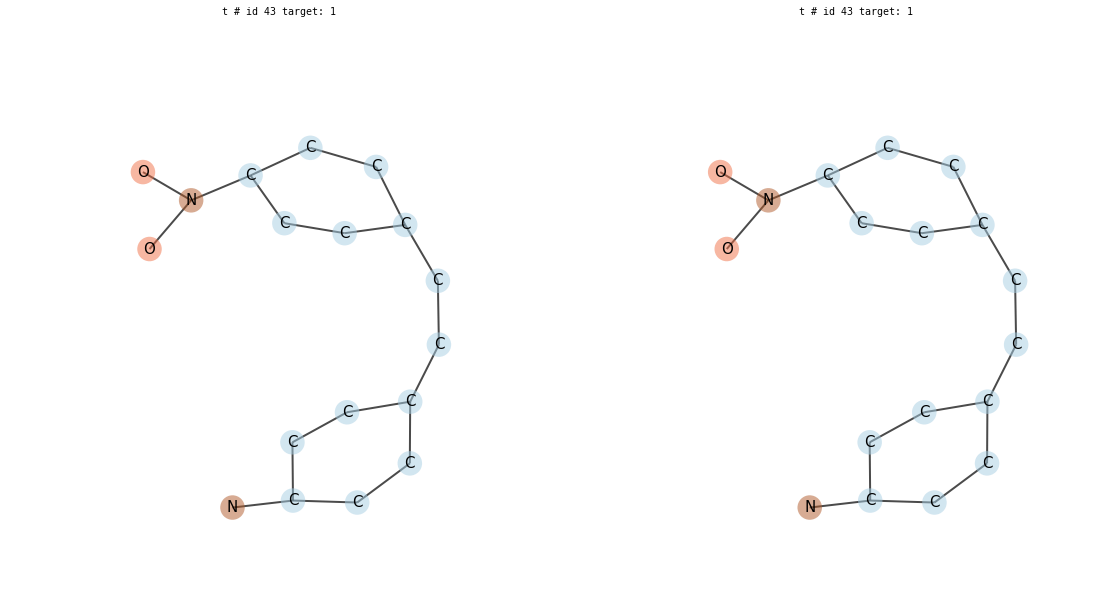

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

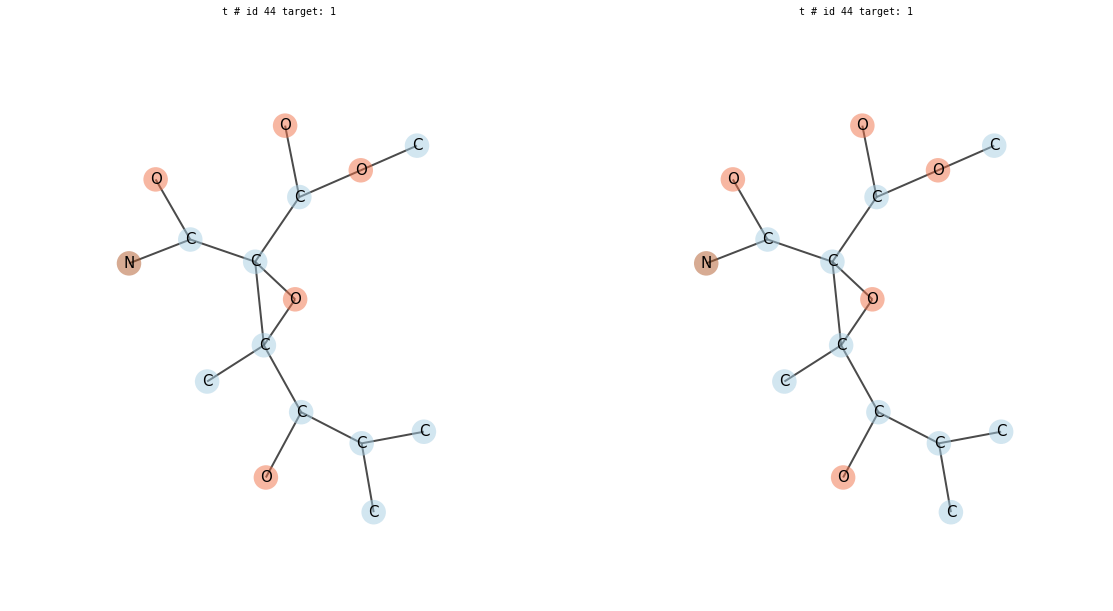

'contracted'
Traceback (most recent call last):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 588, in transform_single
    candidate_graph_decomposer = self._propose(graph_decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 831, in _propose
    proposed_decomposer = self._propose_graph(decomposer)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/graphlearn.py", line 857, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(select_original_cip(decomposer, self)):
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 25, in select_original_cip
    cip = _get_original_cip(decomposer,grammar=sampler.lsgg)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/cip_select.py", line 57, in _get_original_cip
    return decomposer.random_core_interface_pair(radius_list=grammar.radius_list, thickness_list=grammar.thickness_list)
  File "/home/ikea/GRAPHLEARN/GraphLearn/graphlearn/minor/decompose.py", line

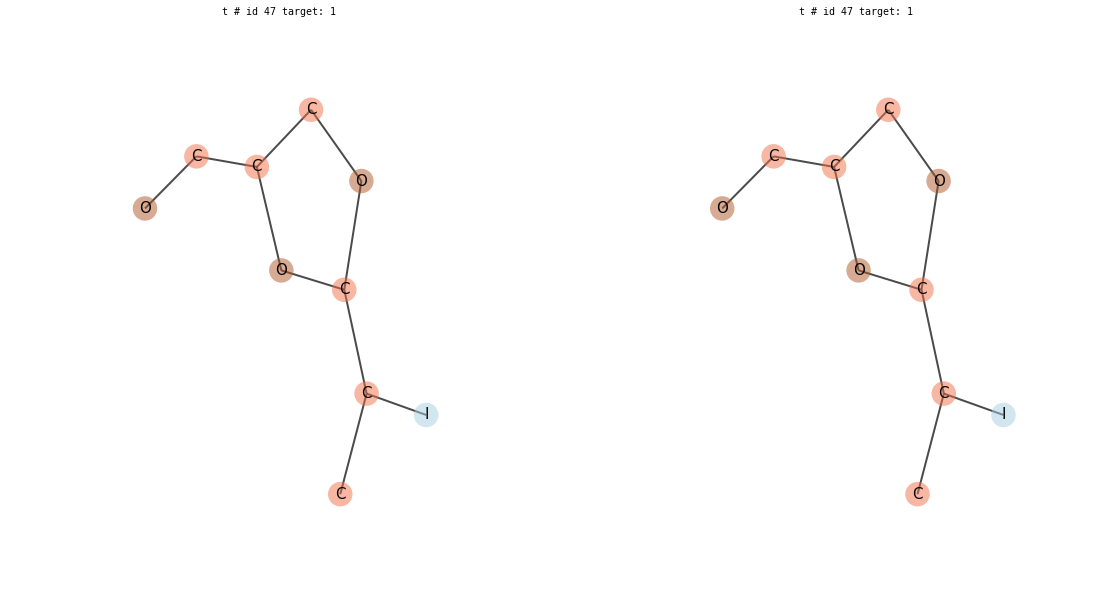

In [7]:
from  graphlearn.utils import draw
    
scores=[]
ids=range(id_start,id_end)
for i,path_graphs in enumerate(graphs):
    # for each sampling path:
    print 'Graph id: %d'%(ids[i])
    
    #collect scores so that we can display the score graph later 
    scores.append( sampler.monitors[i].sampling_info['score_history'] )
    
    # show graphs
    draw.graphlearn(path_graphs,
                        n_graphs_per_line=5, size=10, 
                       colormap='Paired', invert_colormap=False, vertex_color='_label_',
                        vertex_alpha=0.5, edge_alpha=0.7)


## plot score graph

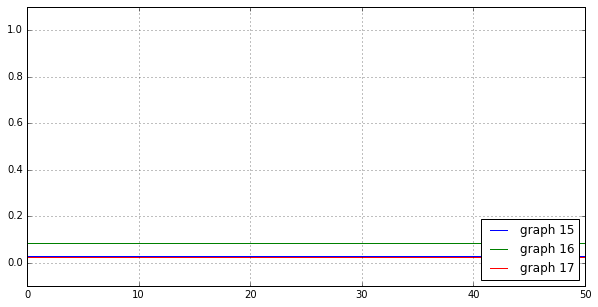

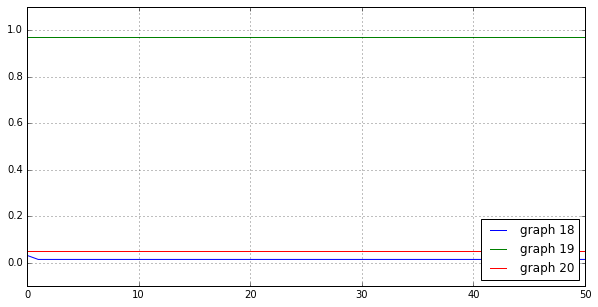

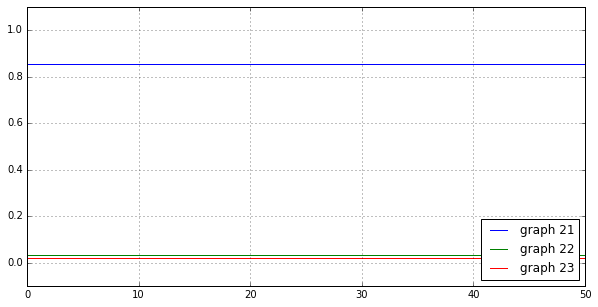

In [8]:
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt

step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

---